In [201]:
#Ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [202]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [203]:
#reading dataset of application_data
application_data=pd.read_csv('application_data.csv')
#reading dataset of previous_application data
previous_application=pd.read_csv('previous_application.csv')

In [204]:
#copying application_data in df
df=application_data.copy()
#copying previous_application data in df1
df1=previous_application.copy()

In [205]:
#printing head of application data
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [206]:
#printing shape of application_data & previous application data
print(df.shape)


(307511, 122)


In [207]:
#to check whether we have null values
df.isnull().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [208]:
#removing value more than 40% of null value.
null_count=df.isnull().sum()
null_count=null_count[null_count>(0.4*len(null_count))]
len(null_count)

64

There are 64 columns which have more than 40% of missing values

In [209]:
#dropping null column more than 40% of missing values
null_count = list(null_count.index)
df.drop(labels=null_count,axis=1,inplace=True)

In [210]:
df.shape

(307511, 58)

In [211]:
#checking percentage of column with null value
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


<AxesSubplot:>

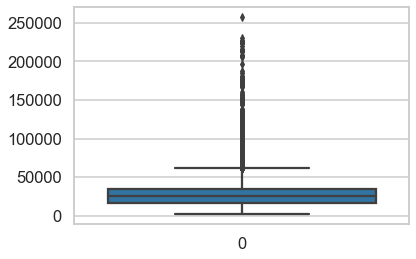

In [212]:
sns.boxplot(data=df.AMT_ANNUITY)

We impute annuity value with median

Annuity column has very few number of null value checking the outliers

In [213]:
values=df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

<AxesSubplot:>

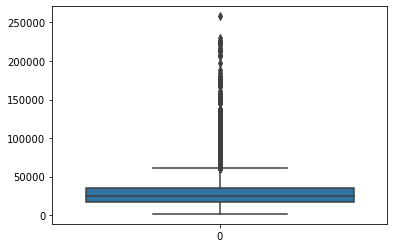

In [14]:
sns.boxplot(data=df.AMT_ANNUITY)

In [214]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

As we checked there is no null values in application data

Removing unwanted document from application data

In [215]:
#removing flag documents
drop_columns=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
         'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','DAYS_LAST_PHONE_CHANGE']
df.drop(labels=drop_columns,axis=1,inplace=True)


In [216]:
df.shape

(307511, 28)

In [217]:
#checking for wrong entries in columns
for i in df.columns:
    print('{} : {}'.format(i,df[i].unique()))


SK_ID_CURR : [100002 100003 100004 ... 456253 456254 456255]
TARGET : [1 0]
NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['M' 'F' 'XNA']
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op a

In [218]:
#Checking gender value and upload with mode
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [219]:
#updating categorical column of gender with mode value ie Female
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [220]:
#changing negative days to postive days
df['DAYS_BIRTH']=abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
df['DAYS_REGISTRATION']=abs(df['DAYS_REGISTRATION'])
df['DAYS_ID_PUBLISH']=abs(df['DAYS_ID_PUBLISH'])

In [221]:
df['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

Checking income type with null value of organization type so that we can identity whether missing at random or not.

In [222]:
df[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

In [223]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

As we see around 55k values are pensioner so we impute pensioner in XNA value in oraganization column


In [224]:
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].replace('XNA','Pensioner')

In [225]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Pensioner                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [226]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0  ...            2120                  WEDNESDAY                      10   
1  ...             291                     MONDAY                      11   
2  ...            2531                     MONDAY                       9   
3  ...            2437                  WEDNESDAY                      17   
4  ...            3458                   THURSDAY                      11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 28 columns]

Handling outliers

In [228]:
outlier_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED']

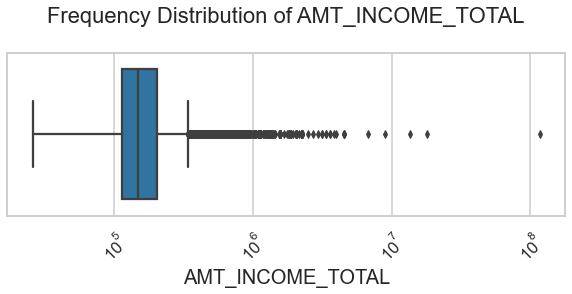

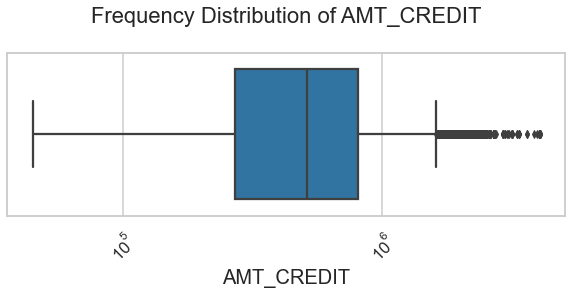

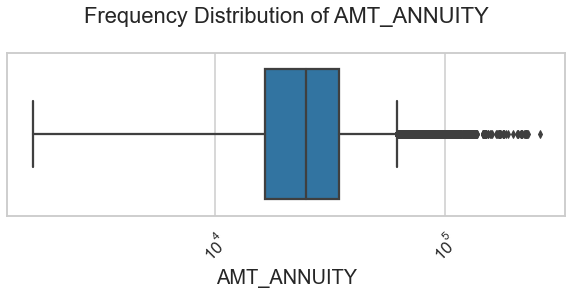

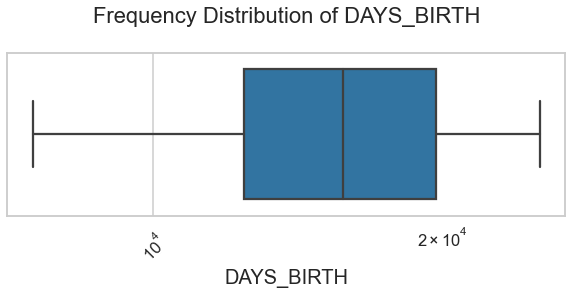

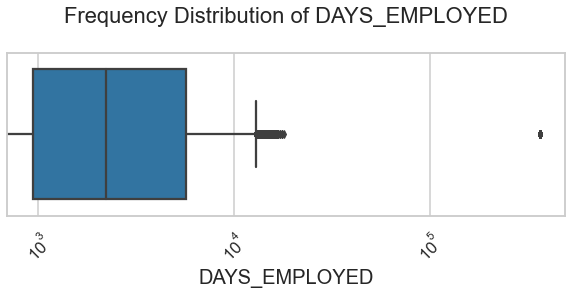

In [229]:
for i in outlier_columns:
    plt.figure(figsize=([10,3]))
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.title("Frequency Distribution of "+i)
    plt.xticks(rotation=45)
    plt.xscale('log')
    plt.show()

Its beneficial to look into quantile than boxplot to find outliers. Quantile can given fair idea about outliers

In [230]:
df.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

As we take a look at AMT_ANNUITY column we can see that there are outliers at 258025.  But there is no much differece between the mean and median, We can impute the outliers with Median here


In [231]:
df.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

there is a huge difference between the maximum value and the 95th or 99th quantiles, then there are outliers in the data set.

Total income will definitely vary from person to person. We can cap the outliers here

In [232]:
df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [233]:
df.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In this AMT_CREDIT column we can see the outliers after 99th quantile at 4.05x10^6
Amount credited also varies from person to person.

DAYS_BIRTH column we can see from box plot that there are no outliers. There is no much difference between mean and median. Which means that all the applications received from the customers are of almost same age. 

In [235]:
df.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

DAYS_EMPLOYED column has outliers at 365243. Number of days the person was employed varies from person to person

# Binning Values

In [236]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [237]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [238]:
bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

df['AGE_RANGE']=pd.cut(df['DAYS_BIRTH'],bins,labels=slot)

In [239]:
#Calculating imbalance percentage
100*(df['TARGET'].value_counts())/len(df)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Around 91.9% of customer have no difficulties in payment

In [242]:
#Dividing two dataset for TARGET 
target_1=df[df['TARGET']==1]
target_0=df[df['TARGET']==0]


In [245]:
#checking imbalance 
imbalance=round(len(target_0)/len(target_1),2)
print(imbalance)

11.39


Text(0.5, 1.0, 'Anaylsis for Imbalance for TARGET')

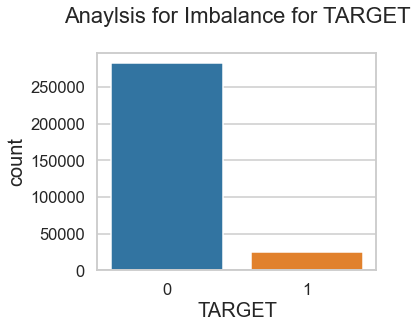

In [252]:
plt.figure(figsize=([5,4]))
sns.countplot(data=df,x='TARGET')
plt.title('Anaylsis for Imbalance for TARGET')


# ANALYSIS 

# Univariant analysis for continuous variables

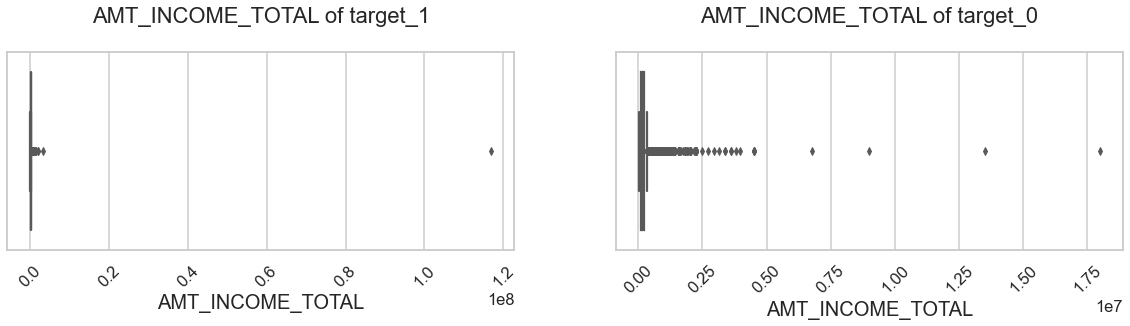

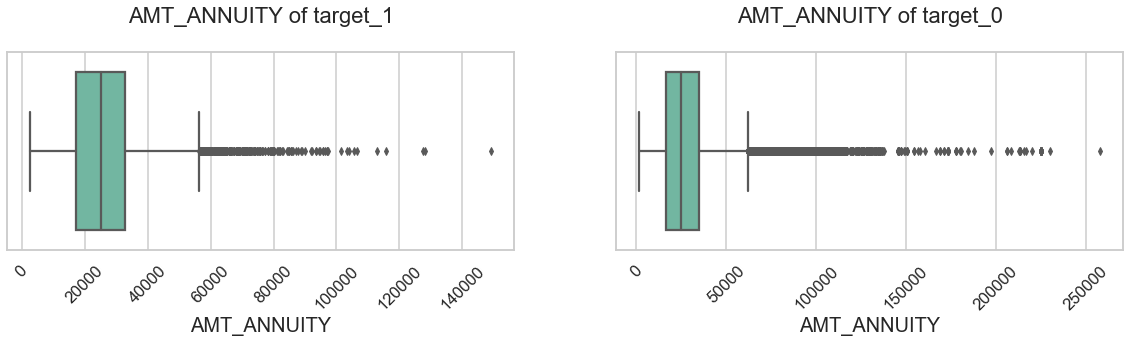

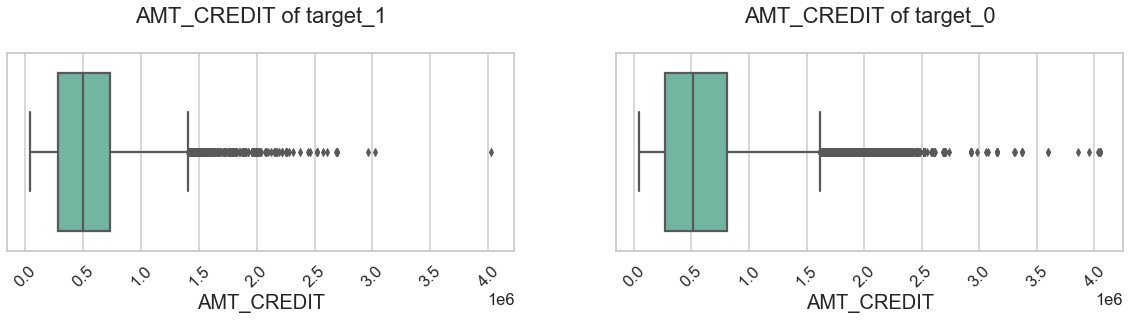

In [241]:
for i in cont_columns:
    plt.figure(figsize = (20,8))
    plt.subplot(2, 2, 1)
    plt.title(i+' of target_1')
    plt.xticks(rotation=45)
    sns.boxplot(x=target_1[i],palette='Set2')

    # subplot 2
    plt.subplot(2, 2, 2)
    plt.title(i+' of target_0')
    plt.xticks(rotation=45)
    sns.boxplot(x=target_0[i],palette='Set2')
    plt.show()

1. Amount credited varies from person to person.
2. Low quantile is smaller than middle quantilem for credit amount
3. Outliers are there above 99% quantile
4. There is a huge difference between the maximum value and the 99th quantiles in income amount
5. Most of the customers annuity approximaly 60K

# Univariant Analysis

Analysis for univariant for target1 & target0 in segmented continous variable

In [253]:
cont_columns=['AMT_INCOME_RANGE','AGE_RANGE','AMT_CREDIT_RANGE']

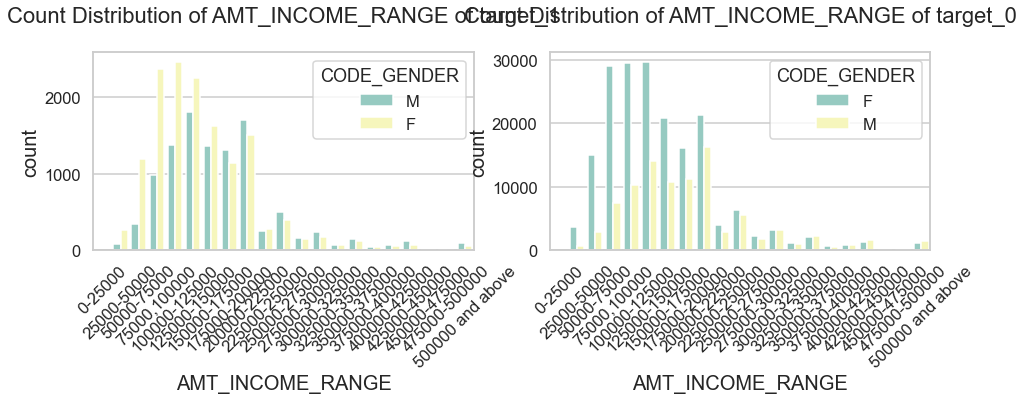

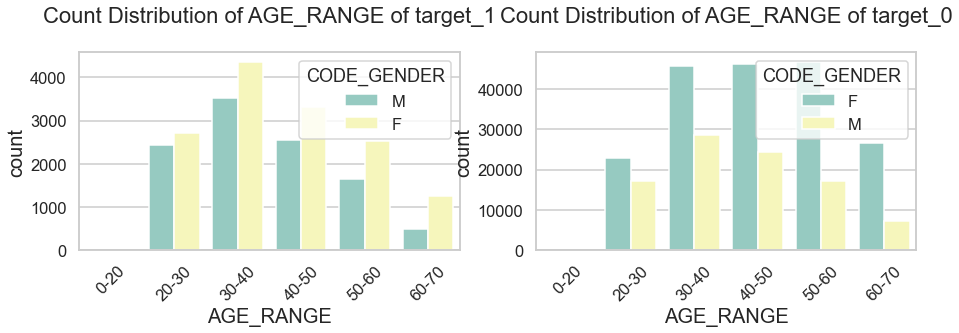

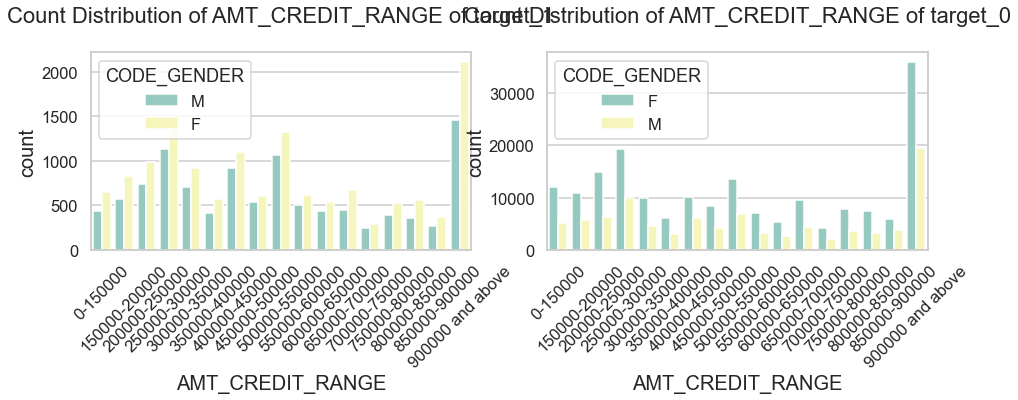

In [254]:
for i in cont_columns:
    plt.figure(figsize = (15, 8))
    plt.subplot(2, 2, 1)
    plt.title('Count Distribution of '+i+' of target_1')
    plt.xticks(rotation=45)
    sns.countplot(x=i,hue='CODE_GENDER',data=target_1,palette='Set3')

    # subplot 2
    plt.subplot(2, 2, 2)
    plt.title('Count Distribution of '+i+' of target_0')
    plt.xticks(rotation=45)
    sns.countplot(x=i,hue='CODE_GENDER',data=target_0,palette='Set3')
    plt.show()

Points to conclude:
   1. Income range from 100000 to 200000 is having more number of credits.
   2. This graph show that males are more than female in having credits for that range in target0.
   3. Very less count for income range 400000 and above.
   4. This graph show that females are more than males in having credits for that range in target1.
   5. Female counts are higher than male in target0.
   6. Male counts are higher than female in target1.

Analysis for univariant for target1 & target0 in categorical variable

In [255]:
categorical_columns=['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE']

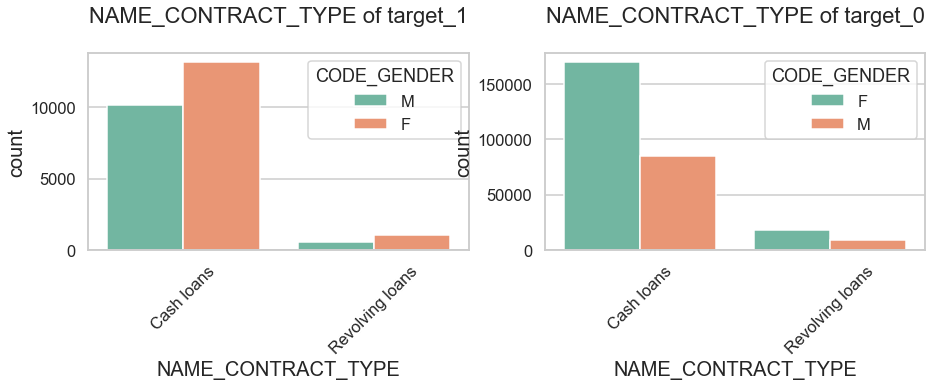

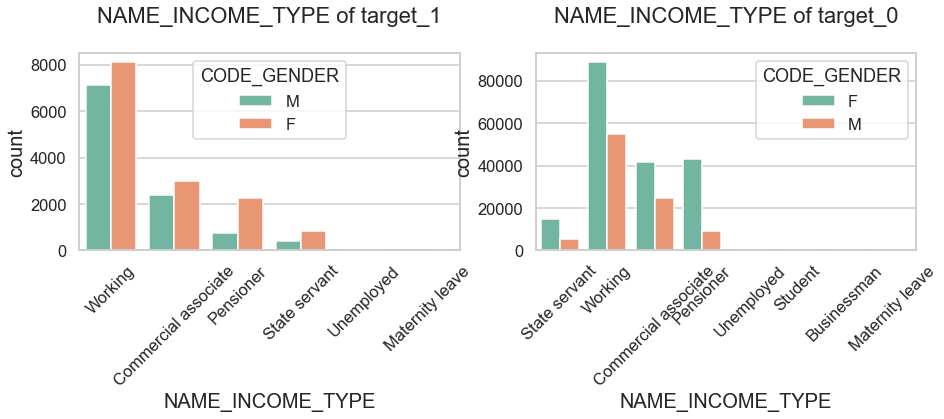

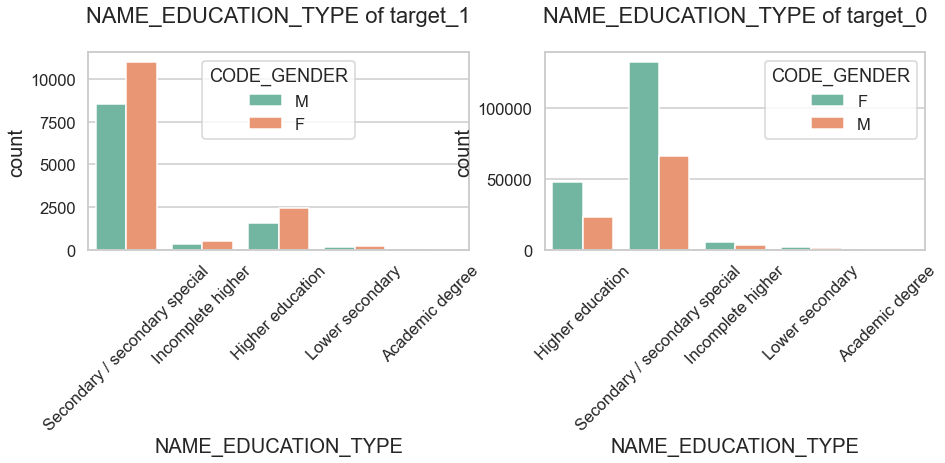

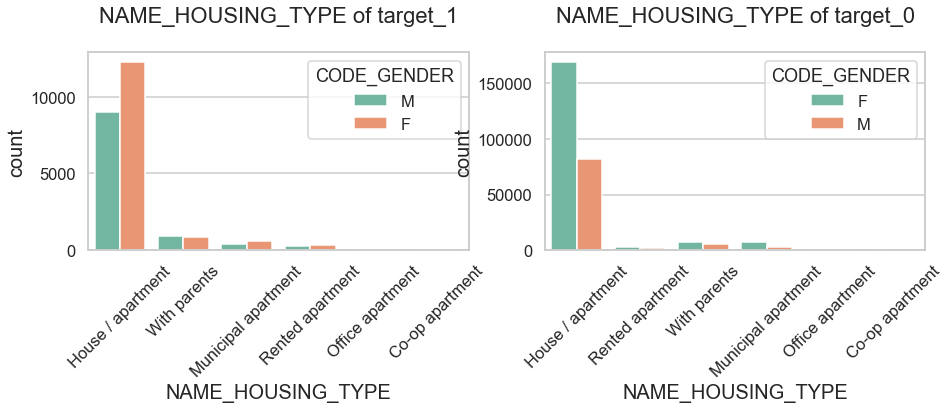

In [256]:
for i in categorical_columns:
    plt.figure(figsize = (15, 8))
    plt.subplot(2, 2, 1)
    plt.title(i+' of target_1')
    plt.xticks(rotation=45)
    sns.countplot(x=i,hue='CODE_GENDER',data=target_1,palette='Set2')

    # subplot 2
    plt.subplot(2, 2, 2)
    plt.title(i+' of target_0')
    plt.xticks(rotation=45)
    sns.countplot(x=i,hue='CODE_GENDER',data=target_0,palette='Set2')
    plt.show()

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher other than maternity
4. For this Females are having more number of credits than male.
5. Less number of credits for income type  ‘Maternity leave’,'student','unemployed'.


In [257]:
# Univariant analysis on ORGANIZATION_TYPE for target 0 and target1

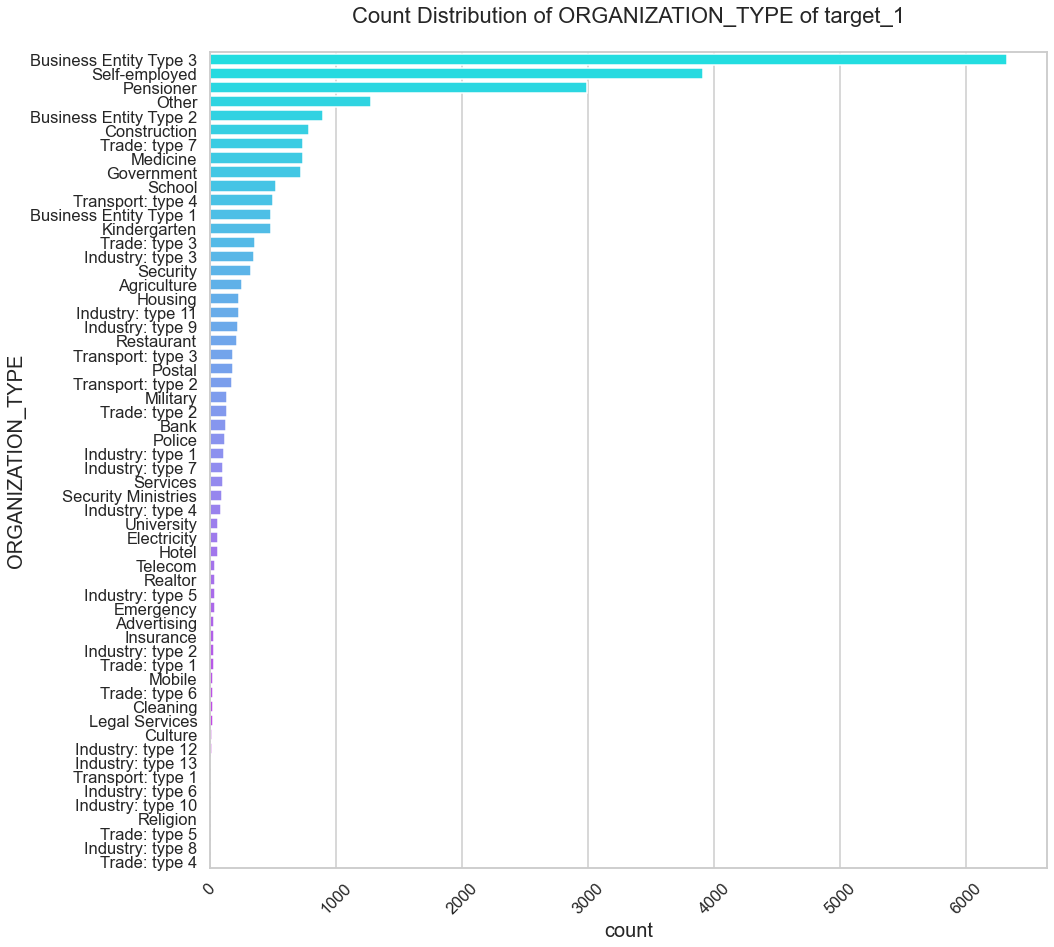

In [258]:
plt.figure(figsize = (15,15))
plt.title('Count Distribution of ORGANIZATION_TYPE of target_1')
plt.xticks(rotation=45)
sns.countplot(y='ORGANIZATION_TYPE',data=target_1,order=target_1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()


1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.
3. Same as type 0 in distribution of organization type.


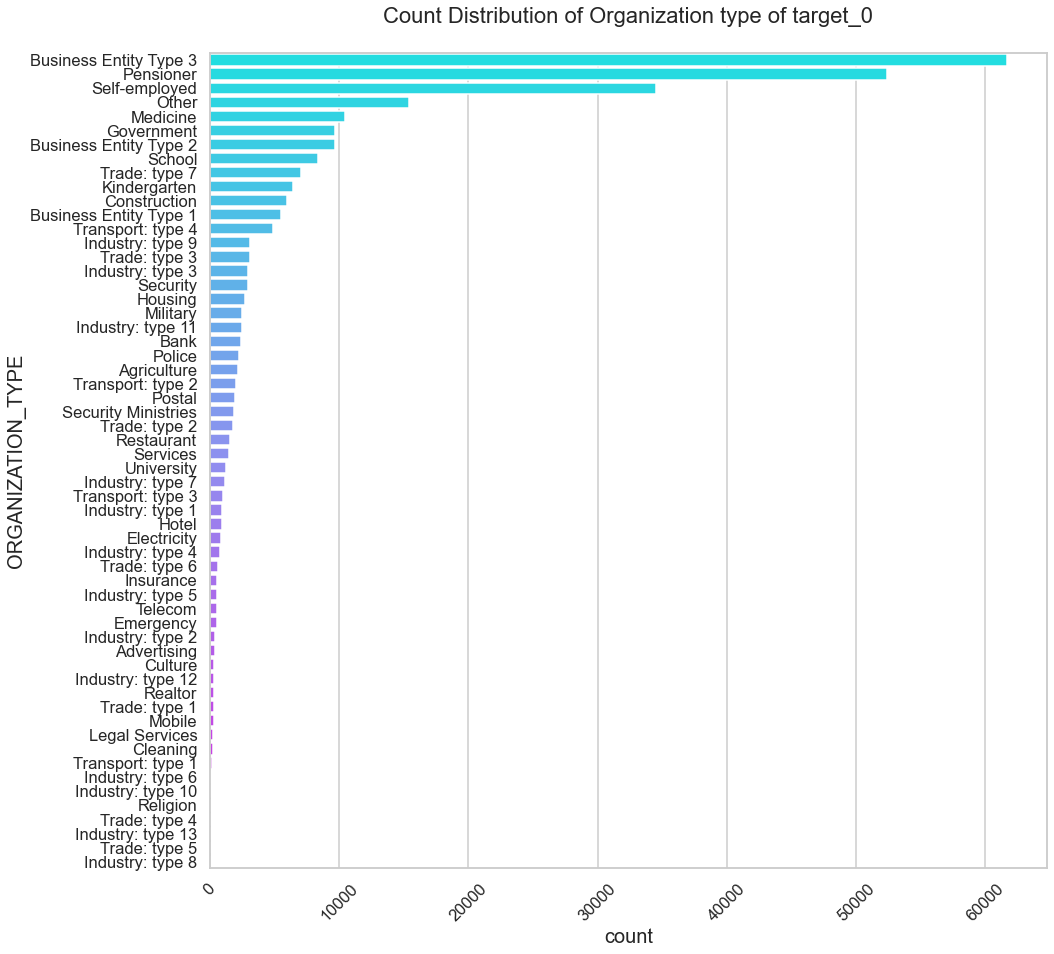

In [259]:
plt.figure(figsize = (15, 15))
plt.title('Count Distribution of Organization type of target_0')
plt.xticks(rotation=45)
sns.countplot(y='ORGANIZATION_TYPE',data=target_0,order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


# Bivariant analysis

Analysis of bivariant in df dataframe based on target variable


In [261]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'AGE_RANGE'],
      dtype='object')

In [262]:
cont_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']

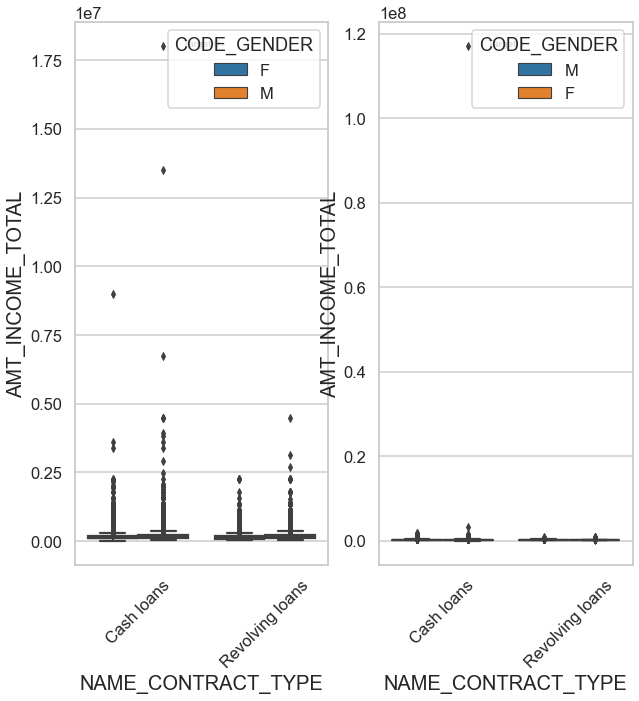

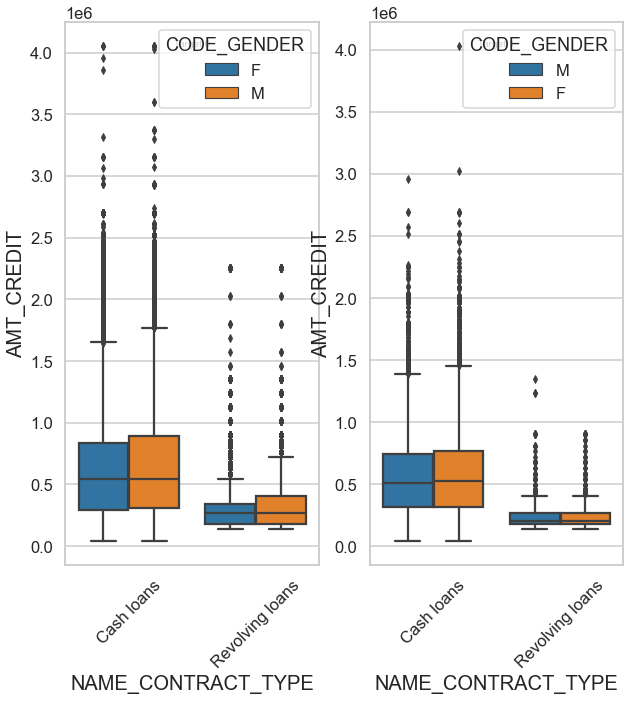

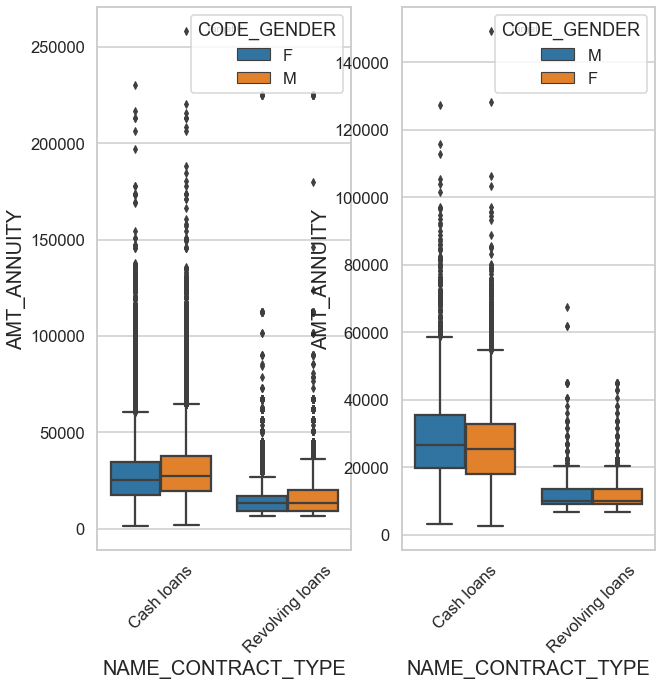

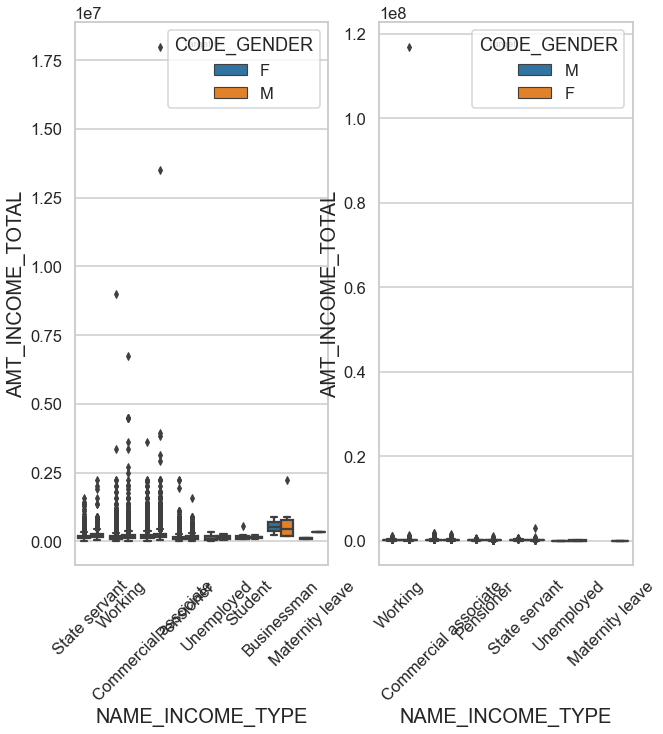

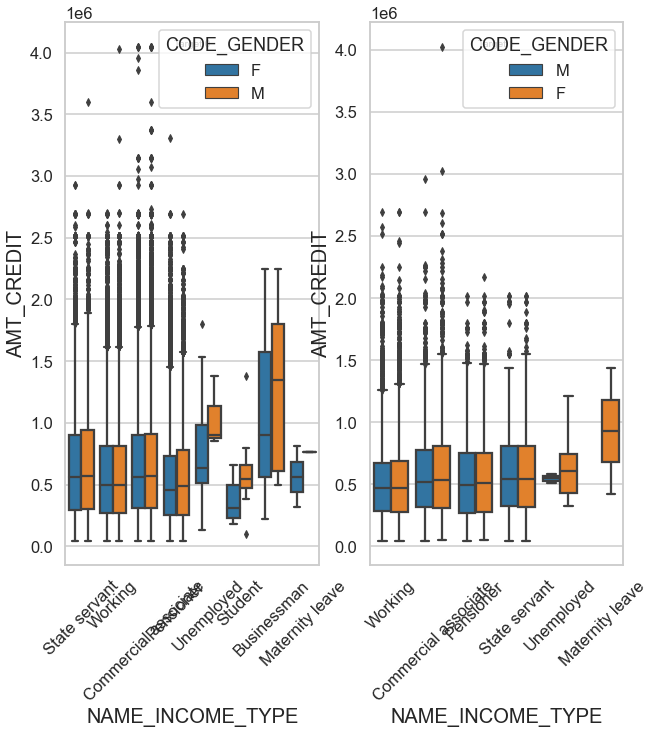

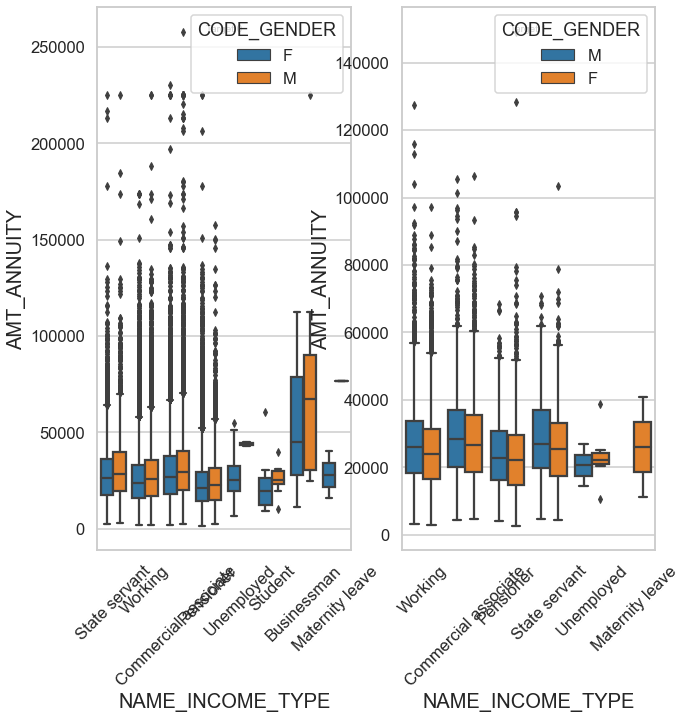

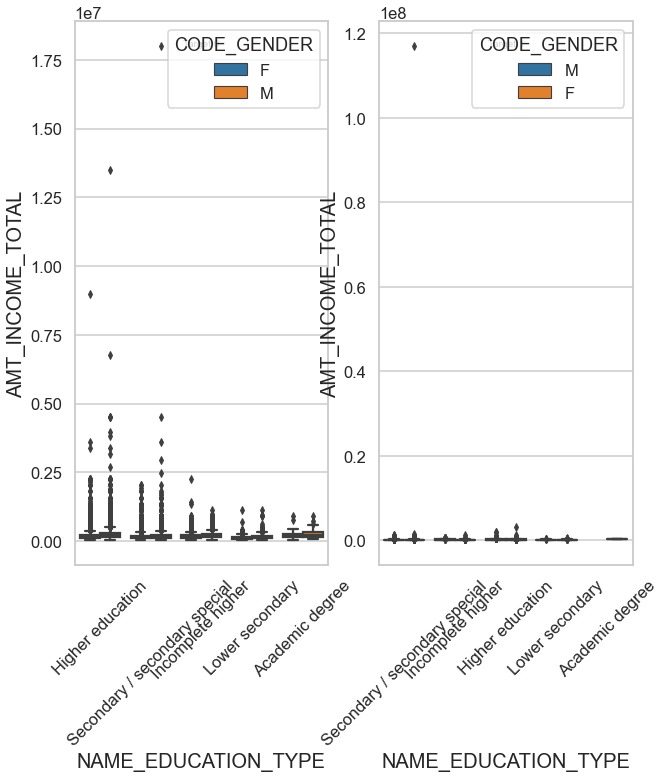

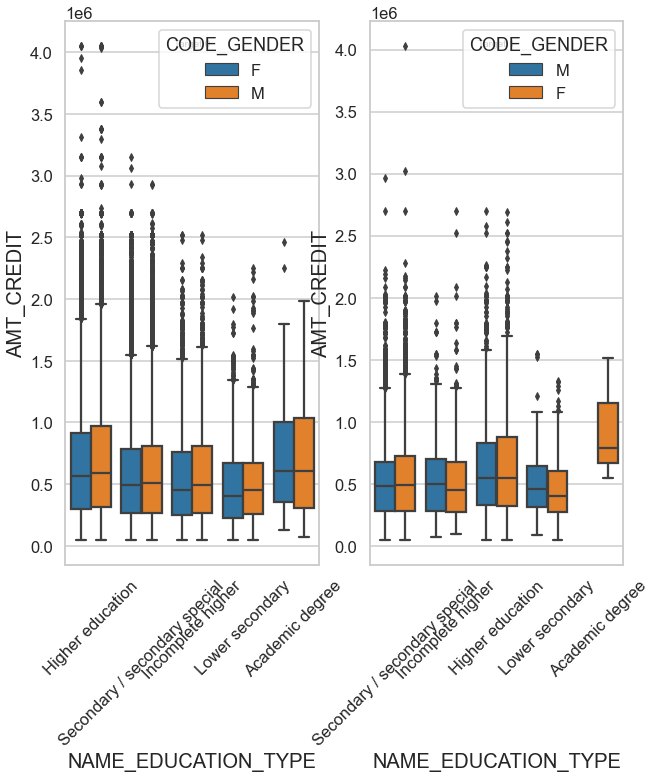

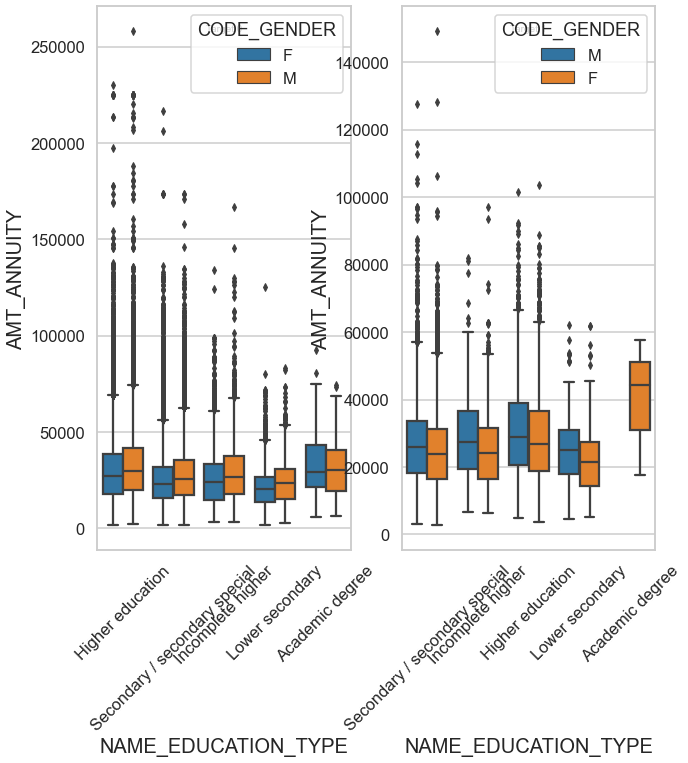

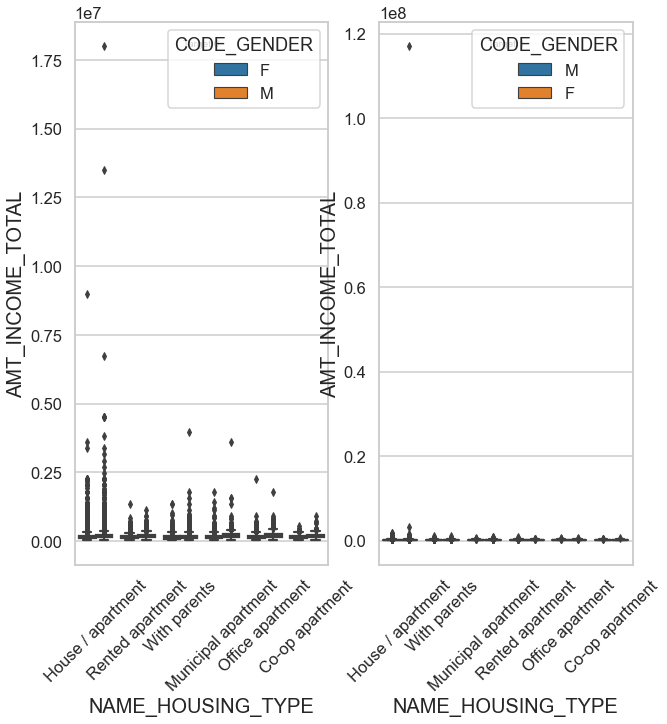

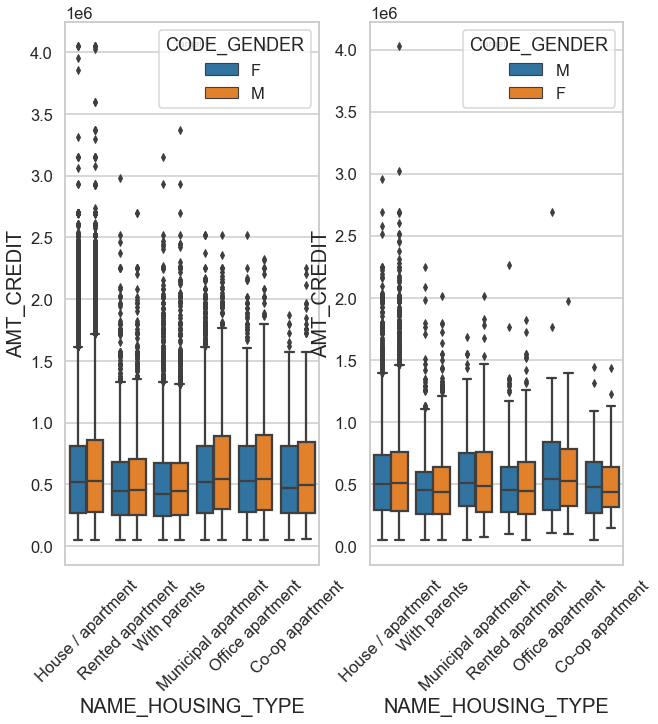

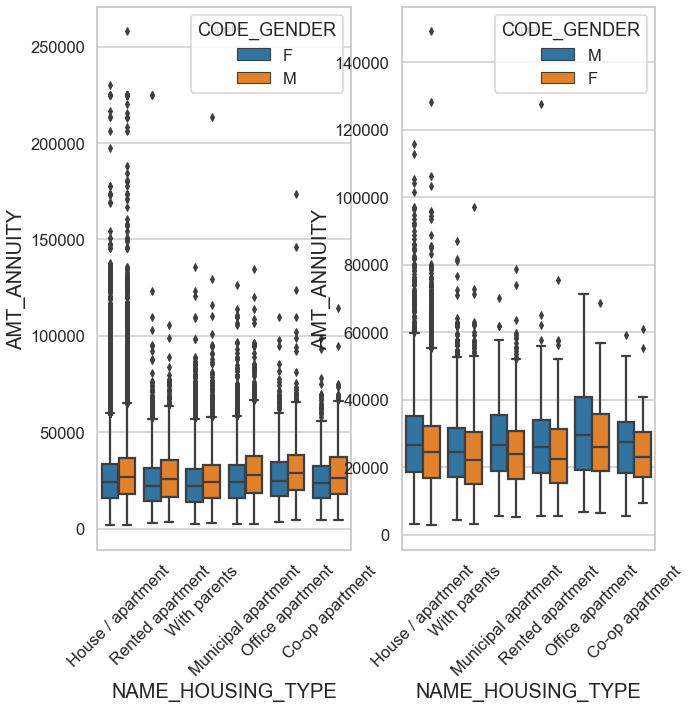

In [263]:
for x in categorical_columns:
    for y in cont_columns:
        plt.figure(figsize=([10,10]))
        plt.subplot(1,2,1)
        sns.boxplot(data =target_0, x=x,y=y, hue ='CODE_GENDER',orient='v')
        plt.xlabel(x)
        plt.title('Target 0',y=0.9,fontsize=10)
        plt.xticks(rotation=45)
        
        plt.subplot(1,2,2)
        sns.boxplot(data =target_1, x=x,y=y, hue ='CODE_GENDER',orient='v')
        plt.xlabel(x)
        plt.title('Target 1',y=0.9,fontsize=10)
        plt.xticks(rotation=45)
        plt.show()

In [268]:
# To view clear part of income type have changed y limit and plotted separately

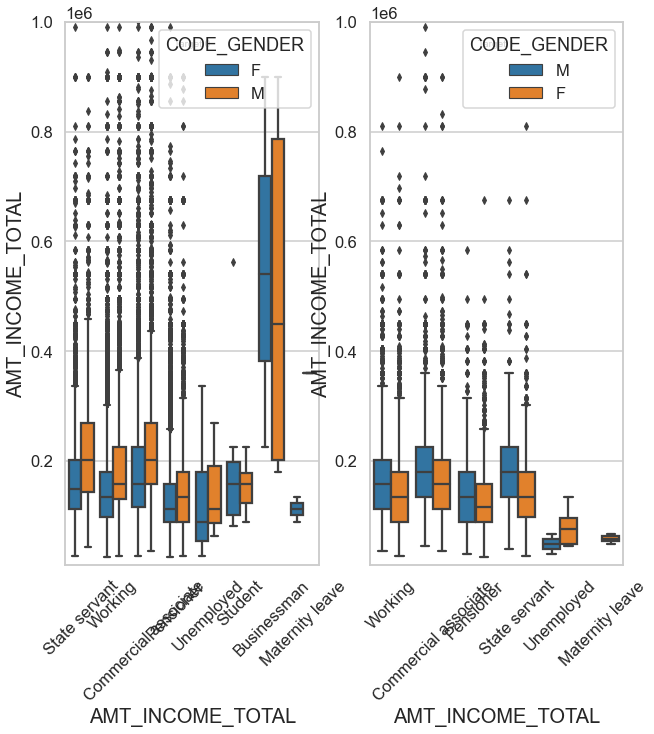

In [264]:
plt.figure(figsize=([10,10]))
plt.subplot(1,2,1)
sns.boxplot(data =target_0, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylim([10000,1000000])
plt.title('Target 0',y=0.9,fontsize=10)
plt.xticks(rotation=45)
        
plt.subplot(1,2,2)
sns.boxplot(data =target_1, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylim([10000,1000000])
plt.title('Target 1',y=0.9,fontsize=10)
plt.xticks(rotation=45)
plt.show()

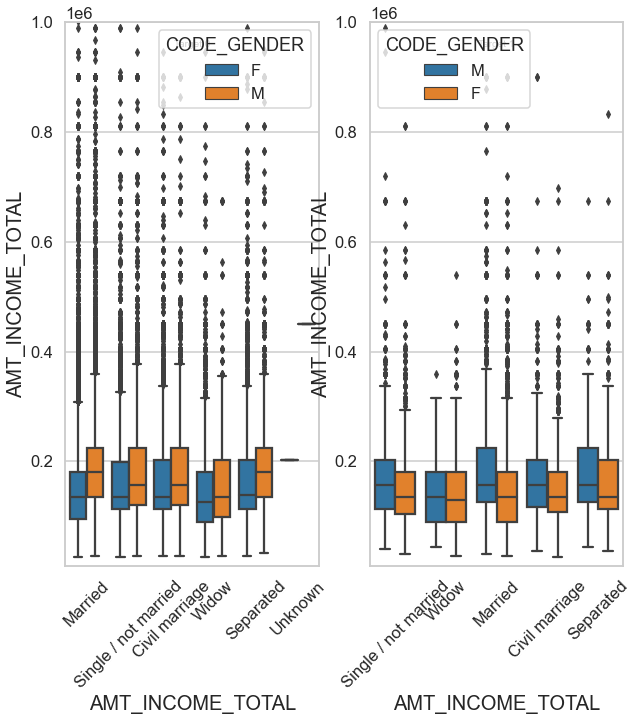

In [265]:
plt.figure(figsize=([10,10]))
plt.subplot(1,2,1)
sns.boxplot(data =target_0, x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylim([10000,1000000])
plt.title('Target 0',y=0.9,fontsize=10)
plt.xticks(rotation=45)
        
plt.subplot(1,2,2)
sns.boxplot(data =target_1, x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylim([10000,1000000])
plt.title('Target 1',y=0.9,fontsize=10)
plt.xticks(rotation=45)
plt.show()

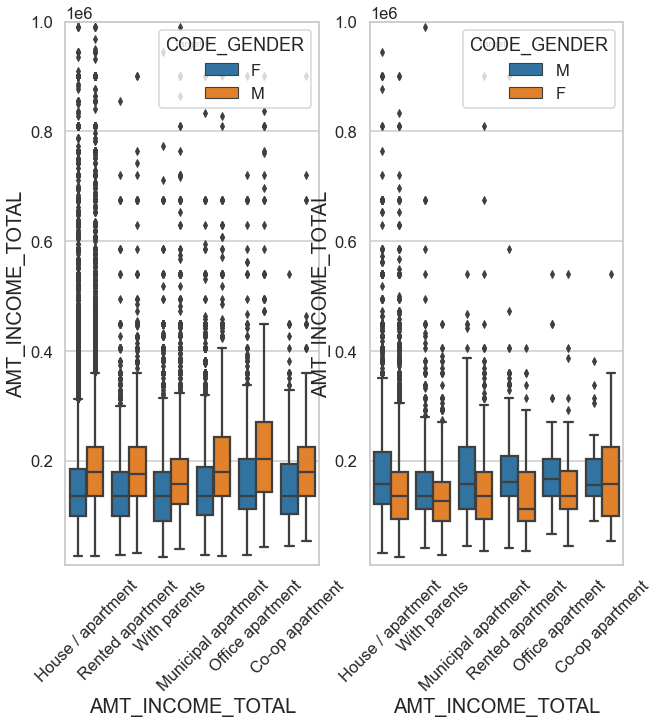

In [266]:
plt.figure(figsize=([10,10]))
plt.subplot(1,2,1)
sns.boxplot(data =target_0, x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylim([10000,1000000])
plt.title('Target 0',y=0.9,fontsize=10)
plt.xticks(rotation=45)
        
plt.subplot(1,2,2)
sns.boxplot(data =target_1, x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylim([10000,1000000])
plt.title('Target 1',y=0.9,fontsize=10)
plt.xticks(rotation=45)
plt.show()

Points to conclude
1. Clients with `Academic Degree` have a wide range of credits for Target 0 whereas the range is much lower for ones with Target 0 
2. Clients with `Academic Degree` and Payment difficulties take mean and median credit at a much higher range than On-Time Payment clients 
3. `Male` clients with `Academic Degree` always pay the loan on-time
4. Businessman clients do their payments on time
5. Student client do their payments on time
6. Clients who are `Unemployed` and `Male` have a very high income in Target 0 than Target 1
7. Clients who are in `Maternity Leave` and `Female` have a very high income in Target 0 than Target 1
8. Married clients have a slightly higher mean/median income with Target 0 than Target 1
9. Client who in office apartment pay loan on time 
10. Client who in Co op apartment have high range in Target 1 than target 0


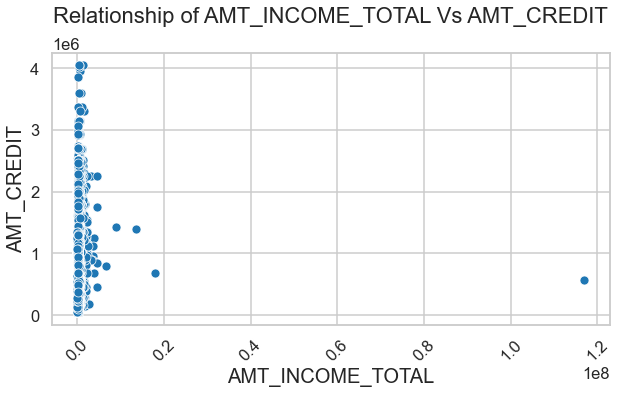

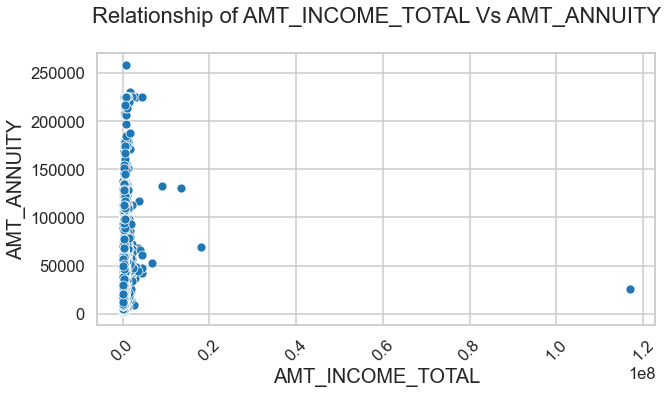

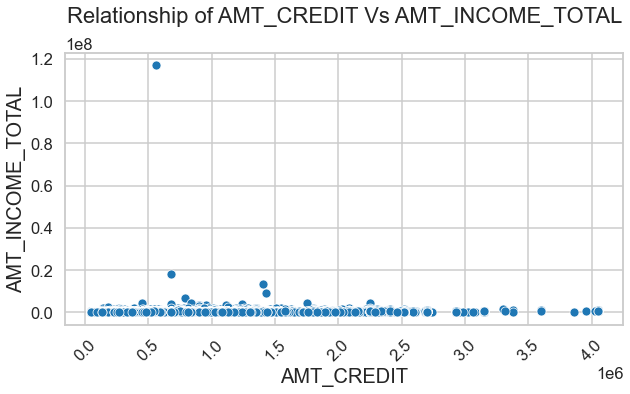

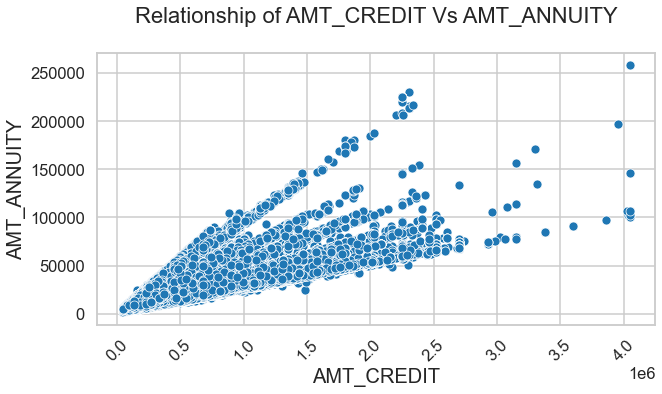

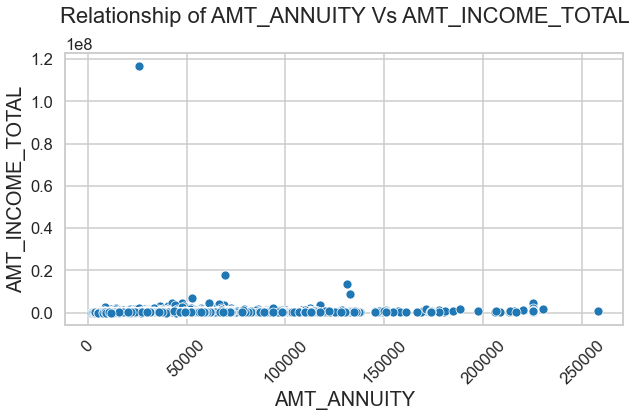

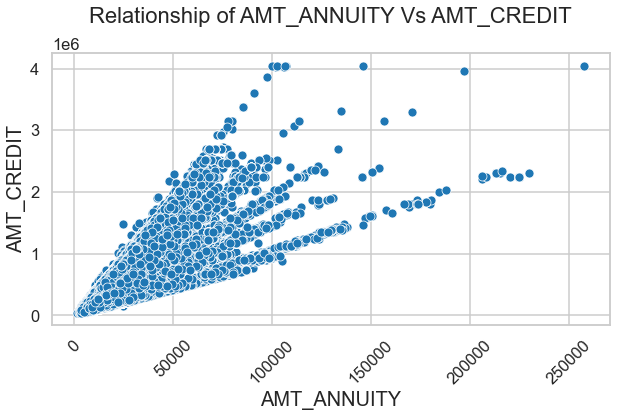

In [267]:
#Bivariant analysis for continous variables
for i in cont_columns:
    for j in cont_columns:
        if i!=j:
            plt.figure(figsize=([10,5]))
            sns.scatterplot(df[i],df[j])
            plt.xlabel(i)
            plt.title('Relationship of '+i+' Vs '+j)
            plt.xticks(rotation=45)
            plt.show()

Points to conclude
1. Amount credit and amount annuity have strong positive coorelation.
2. If Amount credit increases amount annuity also increases.


# CORRELATION 

In [269]:
# Finding some correlation for numerical columns for both target 0 and 1 
target0_corr=target_0.iloc[0:,2:]
target1_corr=target_1.iloc[0:,2:]

corr0=target0_corr.corr(method='spearman')
corr1=target1_corr.corr(method='spearman')


In [270]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

In [271]:
corr0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.038308    0.002315   
AMT_INCOME_TOTAL                 0.038308          1.000000    0.416017   
AMT_CREDIT                       0.002315          0.416017    1.000000   
AMT_ANNUITY                      0.024767          0.485689    0.831885   
REGION_POPULATION_RELATIVE      -0.025551          0.097772    0.053570   
DAYS_BIRTH                      -0.375639         -0.093515    0.057151   
DAYS_EMPLOYED                   -0.205693         -0.095898    0.017986   
DAYS_REGISTRATION               -0.180517         -0.076387   -0.009416   
DAYS_ID_PUBLISH                  0.019986         -0.035931    0.001982   
HOUR_APPR_PROCESS_START          0.001725          0.102384    0.051370   
REG_REGION_NOT_LIVE_REGION      -0.010738          0.078372    0.019093   
REG_REGION_NOT_WORK_REGION       0.015455          0.161441    0.045430   
LIVE_REGION_NOT_WORK_REGION      0.021523          0.148976    0.047740   
REG_CITY_NOT_LIVE_CITY           0.027788          0.020368   -0.026649   
REG_CITY_NOT_WORK_CITY           0.076212          0.040087   -0.012662   
LIVE_CITY_NOT_WORK_CITY          0.071585          0.040321    0.006972   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.024767                   -0.025551   
AMT_INCOME_TOTAL                0.485689                    0.097772   
AMT_CREDIT                      0.831885                    0.053570   
AMT_ANNUITY                     1.000000                    0.058591   
REGION_POPULATION_RELATIVE      0.058591                    1.000000   
DAYS_BIRTH                     -0.011740                    0.030730   
DAYS_EMPLOYED                  -0.030195                   -0.003651   
DAYS_REGISTRATION              -0.037717                    0.036684   
DAYS_ID_PUBLISH                -0.016570                    0.010463   
HOUR_APPR_PROCESS_START         0.054189                    0.128237   
REG_REGION_NOT_LIVE_REGION      0.035819                   -0.019922   
REG_REGION_NOT_WORK_REGION      0.075773                    0.029206   
LIVE_REGION_NOT_WORK_REGION     0.073042                    0.051195   
REG_CITY_NOT_LIVE_CITY         -0.004962                   -0.045545   
REG_CITY_NOT_WORK_CITY          0.009718                   -0.029350   
LIVE_CITY_NOT_WORK_CITY         0.019451                   -0.005476   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                  -0.375639      -0.205693          -0.180517   
AMT_INCOME_TOTAL              -0.093515      -0.095898          -0.076387   
AMT_CREDIT                     0.057151       0.017986          -0.009416   
AMT_ANNUITY                   -0.011740      -0.030195          -0.037717   
REGION_POPULATION_RELATIVE     0.030730      -0.003651           0.036684   
DAYS_BIRTH                     1.000000       0.583711           0.298130   
DAYS_EMPLOYED                  0.583711       1.000000           0.201306   
DAYS_REGISTRATION              0.298130       0.201306           1.000000   
DAYS_ID_PUBLISH                0.261979       0.259900           0.094153   
HOUR_APPR_PROCESS_START       -0.098444      -0.084417           0.008471   
REG_REGION_NOT_LIVE_REGION    -0.066377      -0.071272          -0.025938   
REG_REGION_NOT_WORK_REGION    -0.096421      -0.137882          -0.032723   
LIVE_REGION_NOT_WORK_REGION   -0.070065      -0.112790          -0.024163   
REG_CITY_NOT_LIVE_CITY        -0.180952      -0.145590          -0.055307   
REG_CITY_NOT_WORK_CITY        -0.239113      -0.262852          -0.085865   
LIVE_CITY_NOT_WORK_CITY       -0.156588      -0.198795          -0.062442   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                        0.019986                 0.001725   
AMT_INCOME_TOTAL                   -0.035931                 0.102384   

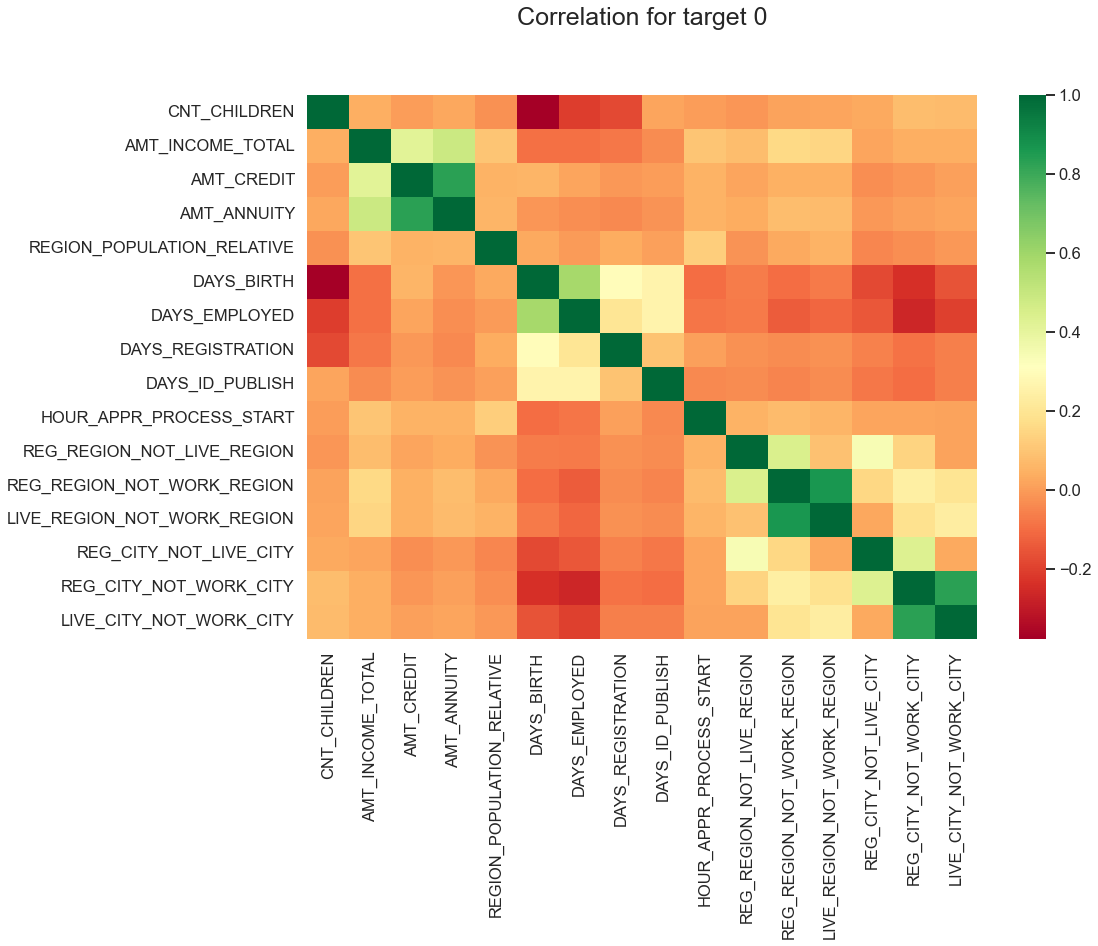

In [272]:
targets_corr(data=corr0,title='Correlation for target 0')

In [273]:
corr1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.004749    0.000200   
AMT_INCOME_TOTAL                -0.004749          1.000000    0.359276   
AMT_CREDIT                       0.000200          0.359276    1.000000   
AMT_ANNUITY                      0.033679          0.431617    0.811443   
REGION_POPULATION_RELATIVE      -0.031628          0.051463    0.039919   
DAYS_BIRTH                      -0.267862          0.007238    0.155216   
DAYS_EMPLOYED                   -0.127943         -0.036127    0.082434   
DAYS_REGISTRATION               -0.133658         -0.036671    0.017099   
DAYS_ID_PUBLISH                  0.027320          0.005929    0.053780   
HOUR_APPR_PROCESS_START         -0.022469          0.088174    0.028537   
REG_REGION_NOT_LIVE_REGION      -0.025824          0.076449    0.014192   
REG_REGION_NOT_WORK_REGION      -0.019571          0.156053    0.030331   
LIVE_REGION_NOT_WORK_REGION     -0.009823          0.144970    0.032564   
REG_CITY_NOT_LIVE_CITY           0.004127          0.008996   -0.028544   
REG_CITY_NOT_WORK_CITY           0.047486          0.027994   -0.029571   
LIVE_CITY_NOT_WORK_CITY          0.051352          0.030864   -0.011182   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.033679                   -0.031628   
AMT_INCOME_TOTAL                0.431617                    0.051463   
AMT_CREDIT                      0.811443                    0.039919   
AMT_ANNUITY                     1.000000                    0.023297   
REGION_POPULATION_RELATIVE      0.023297                    1.000000   
DAYS_BIRTH                      0.030483                    0.046398   
DAYS_EMPLOYED                  -0.003396                    0.020003   
DAYS_REGISTRATION              -0.035900                    0.034315   
DAYS_ID_PUBLISH                 0.014472                    0.023668   
HOUR_APPR_PROCESS_START         0.032083                    0.105989   
REG_REGION_NOT_LIVE_REGION      0.030930                   -0.032472   
REG_REGION_NOT_WORK_REGION      0.063880                   -0.009009   
LIVE_REGION_NOT_WORK_REGION     0.062370                    0.010621   
REG_CITY_NOT_LIVE_CITY         -0.002849                   -0.057083   
REG_CITY_NOT_WORK_CITY          0.007397                   -0.044331   
LIVE_CITY_NOT_WORK_CITY         0.014922                   -0.016447   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                  -0.267862      -0.127943          -0.133658   
AMT_INCOME_TOTAL               0.007238      -0.036127          -0.036671   
AMT_CREDIT                     0.155216       0.082434           0.017099   
AMT_ANNUITY                    0.030483      -0.003396          -0.035900   
REGION_POPULATION_RELATIVE     0.046398       0.020003           0.034315   
DAYS_BIRTH                     1.000000       0.466526           0.232940   
DAYS_EMPLOYED                  0.466526       1.000000           0.148988   
DAYS_REGISTRATION              0.232940       0.148988           1.000000   
DAYS_ID_PUBLISH                0.251626       0.209881           0.095750   
HOUR_APPR_PROCESS_START       -0.065810      -0.043106           0.032019   
REG_REGION_NOT_LIVE_REGION    -0.055835      -0.075600          -0.015237   
REG_REGION_NOT_WORK_REGION    -0.064540      -0.118454          -0.014323   
LIVE_REGION_NOT_WORK_REGION   -0.039911      -0.090170          -0.010359   
REG_CITY_NOT_LIVE_CITY        -0.165372      -0.144260          -0.033891   
REG_CITY_NOT_WORK_CITY        -0.203415      -0.249624          -0.071324   
LIVE_CITY_NOT_WORK_CITY       -0.108966      -0.167530          -0.052747   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                        0.027320                -0.022469   
AMT_INCOME_TOTAL                    0.005929                 0.088174   

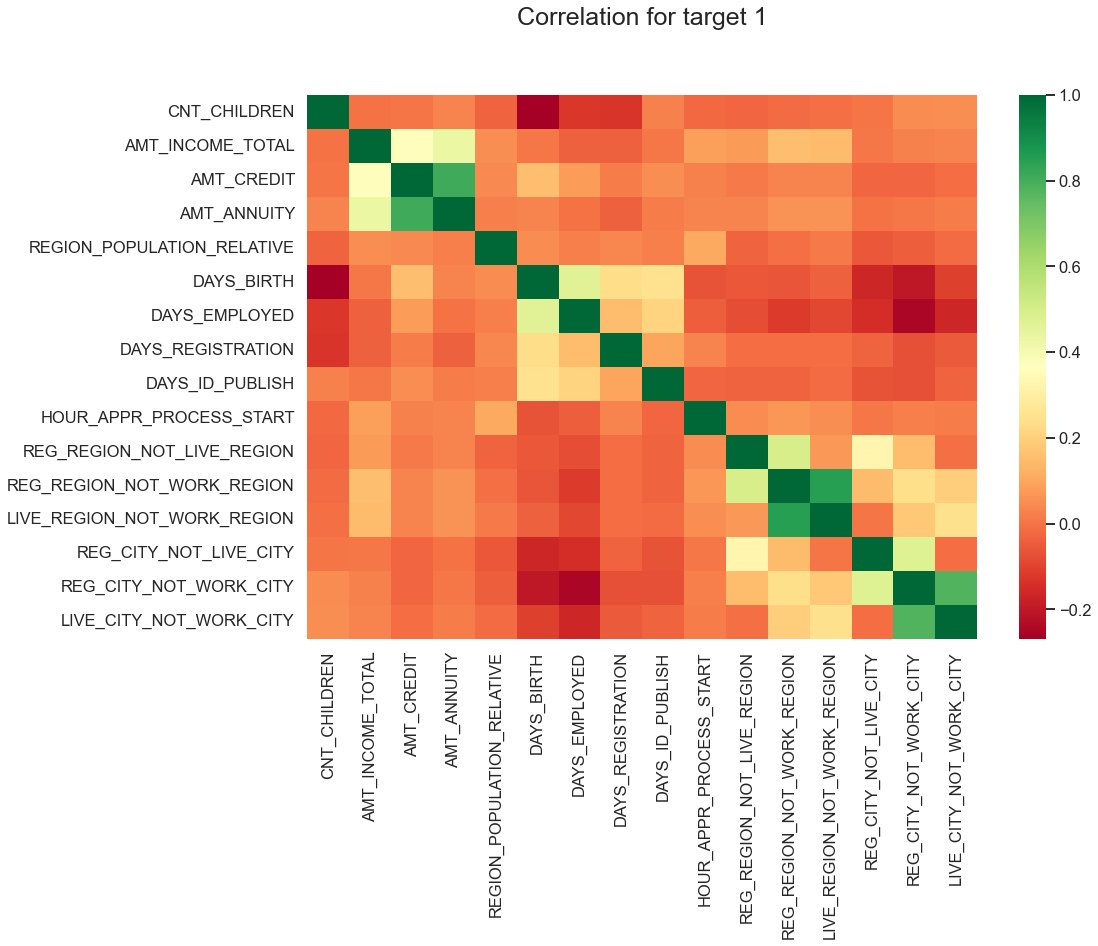

In [274]:
targets_corr(data=corr1,title='Correlation for target 1')

In [275]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution
corr0=corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                          NaN          0.038308    0.002315   
AMT_INCOME_TOTAL                      NaN               NaN    0.416017   
AMT_CREDIT                            NaN               NaN         NaN   
AMT_ANNUITY                           NaN               NaN         NaN   
REGION_POPULATION_RELATIVE            NaN               NaN         NaN   
DAYS_BIRTH                            NaN               NaN         NaN   
DAYS_EMPLOYED                         NaN               NaN         NaN   
DAYS_REGISTRATION                     NaN               NaN         NaN   
DAYS_ID_PUBLISH                       NaN               NaN         NaN   
HOUR_APPR_PROCESS_START               NaN               NaN         NaN   
REG_REGION_NOT_LIVE_REGION            NaN               NaN         NaN   
REG_REGION_NOT_WORK_REGION            NaN               NaN         NaN   
LIVE_REGION_NOT_WORK_REGION           NaN               NaN         NaN   
REG_CITY_NOT_LIVE_CITY                NaN               NaN         NaN   
REG_CITY_NOT_WORK_CITY                NaN               NaN         NaN   
LIVE_CITY_NOT_WORK_CITY               NaN               NaN         NaN   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.024767                   -0.025551   
AMT_INCOME_TOTAL                0.485689                    0.097772   
AMT_CREDIT                      0.831885                    0.053570   
AMT_ANNUITY                          NaN                    0.058591   
REGION_POPULATION_RELATIVE           NaN                         NaN   
DAYS_BIRTH                           NaN                         NaN   
DAYS_EMPLOYED                        NaN                         NaN   
DAYS_REGISTRATION                    NaN                         NaN   
DAYS_ID_PUBLISH                      NaN                         NaN   
HOUR_APPR_PROCESS_START              NaN                         NaN   
REG_REGION_NOT_LIVE_REGION           NaN                         NaN   
REG_REGION_NOT_WORK_REGION           NaN                         NaN   
LIVE_REGION_NOT_WORK_REGION          NaN                         NaN   
REG_CITY_NOT_LIVE_CITY               NaN                         NaN   
REG_CITY_NOT_WORK_CITY               NaN                         NaN   
LIVE_CITY_NOT_WORK_CITY              NaN                         NaN   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                  -0.375639      -0.205693          -0.180517   
AMT_INCOME_TOTAL              -0.093515      -0.095898          -0.076387   
AMT_CREDIT                     0.057151       0.017986          -0.009416   
AMT_ANNUITY                   -0.011740      -0.030195          -0.037717   
REGION_POPULATION_RELATIVE     0.030730      -0.003651           0.036684   
DAYS_BIRTH                          NaN       0.583711           0.298130   
DAYS_EMPLOYED                       NaN            NaN           0.201306   
DAYS_REGISTRATION                   NaN            NaN                NaN   
DAYS_ID_PUBLISH                     NaN            NaN                NaN   
HOUR_APPR_PROCESS_START             NaN            NaN                NaN   
REG_REGION_NOT_LIVE_REGION          NaN            NaN                NaN   
REG_REGION_NOT_WORK_REGION          NaN            NaN                NaN   
LIVE_REGION_NOT_WORK_REGION         NaN            NaN                NaN   
REG_CITY_NOT_LIVE_CITY              NaN            NaN                NaN   
REG_CITY_NOT_WORK_CITY              NaN            NaN                NaN   
LIVE_CITY_NOT_WORK_CITY             NaN            NaN                NaN   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                        0.019986                 0.001725   
AMT_INCOME_TOTAL                   -0.035931                 0.102384   

In [276]:
#convert it to dataframe
corrdf = corr0.unstack().reset_index()
corrdf.head()

level_0                     level_1   0
0  CNT_CHILDREN                CNT_CHILDREN NaN
1  CNT_CHILDREN            AMT_INCOME_TOTAL NaN
2  CNT_CHILDREN                  AMT_CREDIT NaN
3  CNT_CHILDREN                 AMT_ANNUITY NaN
4  CNT_CHILDREN  REGION_POPULATION_RELATIVE NaN

In [277]:
#Changing the names of solumns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

VAR1                        VAR2  Correlation
0  CNT_CHILDREN                CNT_CHILDREN          NaN
1  CNT_CHILDREN            AMT_INCOME_TOTAL          NaN
2  CNT_CHILDREN                  AMT_CREDIT          NaN
3  CNT_CHILDREN                 AMT_ANNUITY          NaN
4  CNT_CHILDREN  REGION_POPULATION_RELATIVE          NaN

In [278]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

VAR1              VAR2  Correlation
16  AMT_INCOME_TOTAL      CNT_CHILDREN     0.038308
32        AMT_CREDIT      CNT_CHILDREN     0.002315
33        AMT_CREDIT  AMT_INCOME_TOTAL     0.416017
48       AMT_ANNUITY      CNT_CHILDREN     0.024767
49       AMT_ANNUITY  AMT_INCOME_TOTAL     0.485689

In [279]:
#Rounding off the values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

VAR1              VAR2  Correlation
16  AMT_INCOME_TOTAL      CNT_CHILDREN         0.04
32        AMT_CREDIT      CNT_CHILDREN         0.00
33        AMT_CREDIT  AMT_INCOME_TOTAL         0.42
48       AMT_ANNUITY      CNT_CHILDREN         0.02
49       AMT_ANNUITY  AMT_INCOME_TOTAL         0.49

In [280]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

VAR1              VAR2  Correlation
16  AMT_INCOME_TOTAL      CNT_CHILDREN         0.04
32        AMT_CREDIT      CNT_CHILDREN         0.00
33        AMT_CREDIT  AMT_INCOME_TOTAL         0.42
48       AMT_ANNUITY      CNT_CHILDREN         0.02
49       AMT_ANNUITY  AMT_INCOME_TOTAL         0.49

In [281]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


VAR1                        VAR2  Correlation
203  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
254      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
50                   AMT_ANNUITY                  AMT_CREDIT         0.83
101                DAYS_EMPLOYED                  DAYS_BIRTH         0.58
49                   AMT_ANNUITY            AMT_INCOME_TOTAL         0.49
186   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION         0.45
237       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY         0.44
33                    AMT_CREDIT            AMT_INCOME_TOTAL         0.42
80                    DAYS_BIRTH                CNT_CHILDREN         0.38
218       REG_CITY_NOT_LIVE_CITY  REG_REGION_NOT_LIVE_REGION         0.34

In [282]:
corr = target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

VAR1                        VAR2  Correlation
265  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
322      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
94                   AMT_ANNUITY                  AMT_CREDIT         0.75
151                DAYS_EMPLOYED                  DAYS_BIRTH         0.58
246   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION         0.50
303       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY         0.47
282       REG_CITY_NOT_LIVE_CITY  REG_REGION_NOT_LIVE_REGION         0.32
169            DAYS_REGISTRATION                  DAYS_BIRTH         0.29
187              DAYS_ID_PUBLISH                  DAYS_BIRTH         0.25
301       REG_CITY_NOT_WORK_CITY  REG_REGION_NOT_WORK_REGION         0.24

POINTS TO CONCLUDE:
Target 0:

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

Target 1:
1. The client's permanent address does not match contact address are having less children and vice-versa
2. The client's permanent address does not match work address are having less children and vice-versa

# Previous Application

In [315]:
#reading previous application 

df1=pd.read_csv("previous_application.csv")
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [316]:
#Cleaning the missing data

# listing the null values columns having more than 40%

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.4*len(emptycol1))]
len(emptycol1)

15

In [317]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 37)

In [318]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(69635, 22)

In [319]:
#percentage of null values in previous application
df1.isnull().sum()/len(df)*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64

In [320]:
# Removing unwanted columns for analysis

df1.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
         'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA'],axis=1,inplace=True)

In [321]:
df1.shape


(69635, 17)

In [322]:
#checking for wrong entries in columns
for i in df1.columns:
    print('{} : {}'.format(i,df1[i].unique()))


SK_ID_PREV : [1784265 1383531 1173070 ... 2815037 2406354 2459206]
SK_ID_CURR : [202054 199383 199178 ... 311444 242904 344933]
NAME_CONTRACT_TYPE : ['Cash loans']
AMT_APPLICATION : [ 337500.     315000.      45000.      67500.     225000.     112500.
  976500.     180000.     229500.     135000.      90000.     450000.
  697500.     675000.    1228500.     247500.     270000.     765000.
 1800000.     162000.     540000.     900000.      76500.     234000.
  103500.    1350000.     157500.     405000.      49500.      58500.
  472500.    1035000.     477000.     495000.     121500.     292500.
  364500.     288000.    1215000.     360000.     990000.    2025000.
 2700000.    1440000.    1125000.    1129500.     238500.    1575000.
 1354500.     801000.     117000.     202500.     720000.     139500.
  328500.     607500.    1372500.     877500.     148500.     967500.
 2250000.     333000.     193500.     427500.     810000.    1138500.
  558000.    1710000.    1552500.     585000.   

In [304]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 17)

In [323]:
df1['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        63835
XNA                                           5416
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

Observations

Though XNA doesn't provide any understanding of Payment TYpe, it indicates Not Applicable
Since this makes up 38% of the data, we will leave it as is


In [324]:
df1['CODE_REJECT_REASON'].value_counts()

XAP       28572
HC        22221
LIMIT      9180
SCO        5167
VERIF      2340
SCOFR      1421
XNA         527
CLIENT      205
SYSTEM        2
Name: CODE_REJECT_REASON, dtype: int64

Observations

Though XAP doesn't provide any understanding of Payment Type, it indicates Not Available
Since this makes up 81% of the data, we will leave it as is


In [325]:
#As data looks valid, we will go ahead and check for an imputation method.

#Repeater applicants make up 74% of applicants
#And so, we will go ahead and impute NAME_CLIENT_TYPE with 'Repeater'
df1['NAME_CLIENT_TYPE'] = df1['NAME_CLIENT_TYPE'].apply(lambda x: 'Repeater' if x == 'XNA' else x)


In [326]:
#around all columns are XNA hence we drop the column
df1.drop(['NAME_GOODS_CATEGORY'],inplace=True,axis=1)


In [327]:
df1['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)

XNA                     0.918978
Connectivity            0.075048
Consumer electronics    0.003188
Furniture               0.002269
MLM partners            0.000258
Construction            0.000172
Industry                0.000072
Clothing                0.000014
Name: NAME_SELLER_INDUSTRY, dtype: float64

Though XNA doesn't provide any understanding of Payment TYpe, it indicates Not Applicable
Since this makes up 91% of the data, we will leave it as is


In [328]:
df1.describe()

SK_ID_PREV     SK_ID_CURR  AMT_APPLICATION    AMT_CREDIT  \
count  6.963500e+04   69635.000000     6.963500e+04  6.963500e+04   
mean   1.935842e+06  278555.901084     4.533566e+05  5.096662e+05   
std    5.300383e+05  103065.139046     4.917079e+05  5.371849e+05   
min    1.000125e+06  100034.000000     0.000000e+00  0.000000e+00   
25%    1.481020e+06  189482.000000     1.350000e+05  1.528200e+05   
50%    1.942746e+06  279260.000000     2.700000e+05  3.065310e+05   
75%    2.393264e+06  368506.000000     6.075000e+05  6.750000e+05   
max    2.845265e+06  456255.000000     4.050000e+06  4.104351e+06   

       DAYS_DECISION  
count   69635.000000  
mean     -648.234164  
std       534.865018  
min     -2465.000000  
25%      -707.000000  
50%      -506.000000  
75%      -313.000000  
max        -2.000000

In [329]:
#Changing negative to positive days
df1['DAYS_DECISION'].value_counts()

-217     130
-336     130
-630     123
-602     122
-452     121
        ... 
-1351      1
-1334      1
-1026      1
-1295      1
-1256      1
Name: DAYS_DECISION, Length: 2200, dtype: int64

In [330]:
#changing days decision from negative to positive integer
df1['DAYS_DECISION']=abs(df1['DAYS_DECISION'])


In [331]:
df1.describe()

SK_ID_PREV     SK_ID_CURR  AMT_APPLICATION    AMT_CREDIT  \
count  6.963500e+04   69635.000000     6.963500e+04  6.963500e+04   
mean   1.935842e+06  278555.901084     4.533566e+05  5.096662e+05   
std    5.300383e+05  103065.139046     4.917079e+05  5.371849e+05   
min    1.000125e+06  100034.000000     0.000000e+00  0.000000e+00   
25%    1.481020e+06  189482.000000     1.350000e+05  1.528200e+05   
50%    1.942746e+06  279260.000000     2.700000e+05  3.065310e+05   
75%    2.393264e+06  368506.000000     6.075000e+05  6.750000e+05   
max    2.845265e+06  456255.000000     4.050000e+06  4.104351e+06   

       DAYS_DECISION  
count   69635.000000  
mean      648.234164  
std       534.865018  
min         2.000000  
25%       313.000000  
50%       506.000000  
75%       707.000000  
max      2465.000000

In [332]:
cont_columns1=['AMT_APPLICATION','AMT_CREDIT','DAYS_DECISION']
categorical_columns1=['NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_PORTFOLIO',
                     'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']

In [333]:
#Merge the previous application with the current application data file
df_merge = df.merge(df1, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')


In [334]:
#renaming columns 
new_df = df_merge.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100035       0           Cash loans           F            N   
2      100039       0           Cash loans           M            Y   
3      100046       0      Revolving loans           M            Y   
4      100046       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0           90000.0      180000.0       9000.0   
1               Y             0          292500.0      665892.0      24592.5   
2               N             1          360000.0      733315.5      39069.0   
3               Y             0          180000.0      540000.0      27000.0   
4               Y             0          180000.0      540000.0      27000.0   

   ... NAME_CONTRACT_STATUS DAYS_DECISION      NAME_PAYMENT_TYPE  \
0  ...             Approved           599  Cash through the bank   
1  ...              Refused           119  Cash through the bank   
2  ...             Approved           695  Cash through the bank   
3  ...             Approved           539  Cash through the bank   
4  ...              Refused           449  Cash through the bank   

  CODE_REJECT_REASON  NAME_CLIENT_TYPE  NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0                XAP               New            Cash            walk-in   
1                 HC          Repeater            Cash            walk-in   
2                XAP         Refreshed            Cash            walk-in   
3                XAP               New            Cash            walk-in   
4              LIMIT          Repeater            Cash            walk-in   

                 CHANNEL_TYPE  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  
0     Credit and cash offices                   XNA             high  
1     Credit and cash offices                   XNA       low_action  
2  Channel of corporate sales                   XNA       low_normal  
3     Credit and cash offices                   XNA       low_normal  
4     Credit and cash offices                   XNA       low_normal  

[5 rows x 46 columns]

# Univariante Analysis

In [336]:
new_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE', 'AGE_RANGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 

In [338]:
#creating separate variable for continuous and categorical variable.
cont_columns1=['AMT_APPLICATION','AMT_CREDIT_y','DAYS_DECISION']
categorical_columns1=['NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_PORTFOLIO',
                     'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']

# Univariate analysis of categorical variables

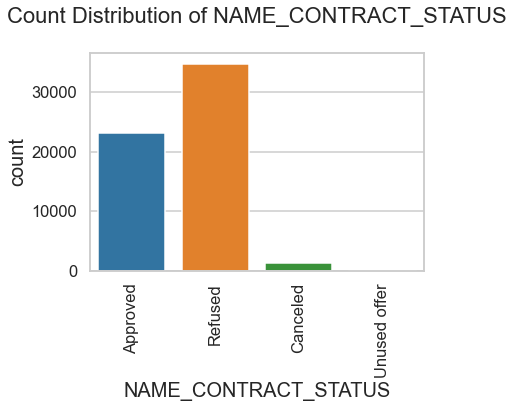

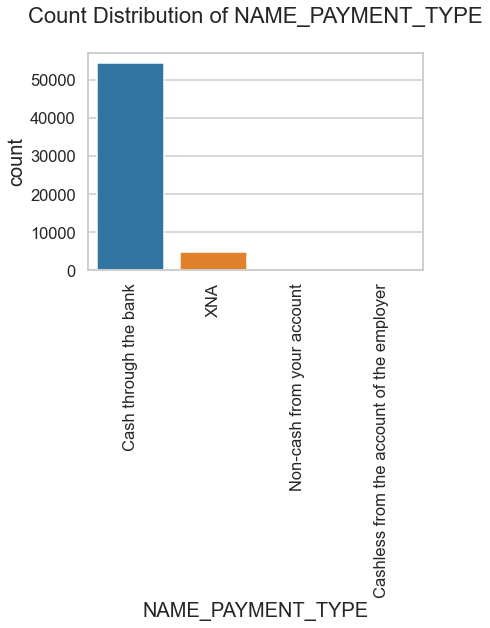

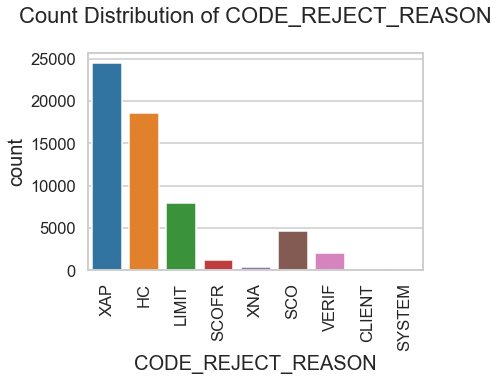

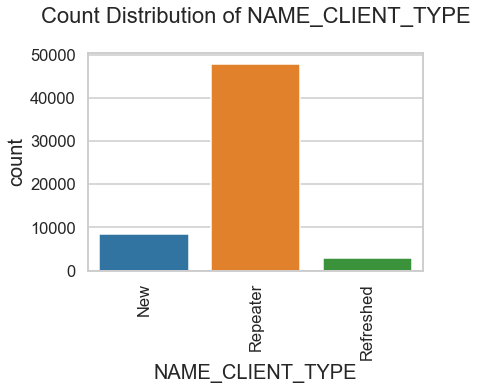

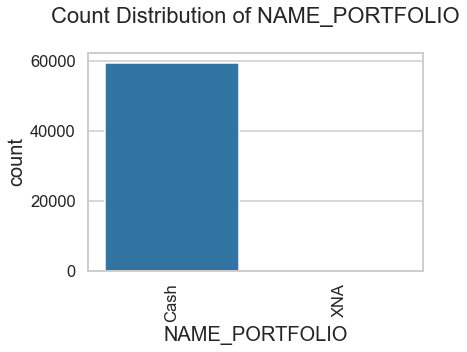

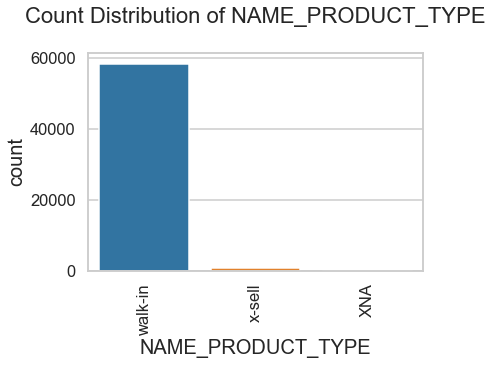

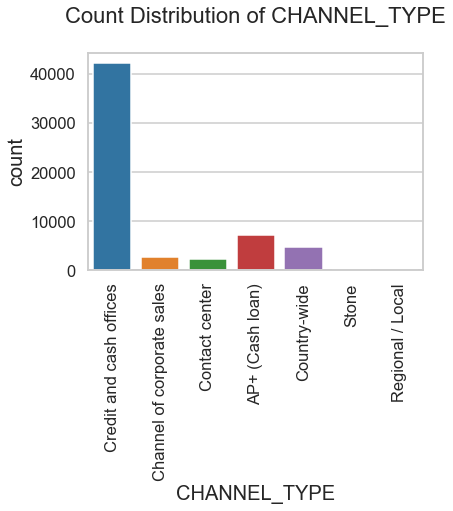

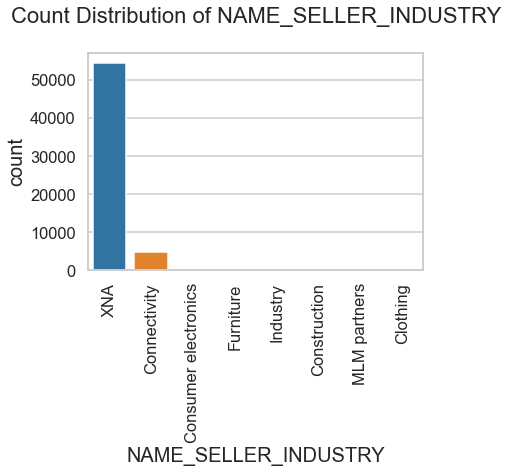

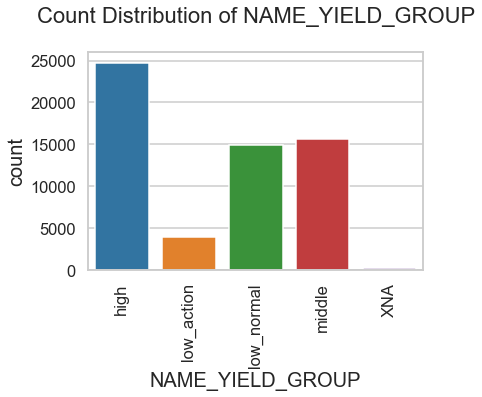

In [111]:
for i in categorical_columns1:
    sns.countplot(new_df[i])
    plt.xlabel(i)
    plt.title("Count Distribution of "+i)
    plt.xticks(rotation=90)
    plt.show()

Points to conclude: 

1. Repeater client have most approved contract status.
2. Refreshed have least approval status in contract status.
3. New client have highest approval than refreshed in contract status.
4. Client who are working have most approval and refusal contract in income name type .
5. Client with secondary/secondary special have highest approval and highest refusal contract status in education type.
6. Academic degree have lease contract status in education types.
7. Co-op apartment has least contract status in housing type.
8. House /apartment has highest approval and refusal contract status in housing type.


# Univariant anaylsis on Continous columns

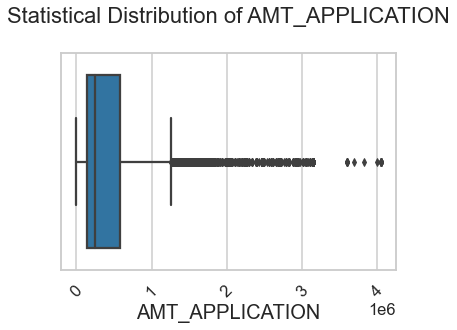

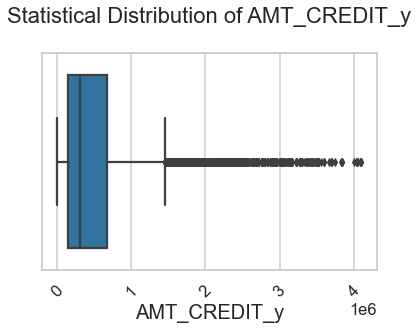

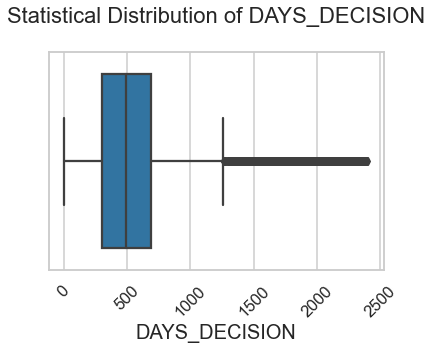

In [123]:
for i in cont_columns1:
    sns.boxplot(new_df[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

1.This distribution very closely resembles that of AMT_APPLICATION. This means that most people received the loan amount that they applied for.

2.Most of the loan amount applied by the clients initially seems to be very small as can be seen from the huge spike at the beginning of the distributio


# Correlation analysis of numerical variables¶


In [339]:
#Correlation calculation.
corr_df = new_df[['AMT_CREDIT_y','AMT_ANNUITY','AMT_APPLICATION','AMT_INCOME_TOTAL']].corr()
corr_df

AMT_CREDIT_y  AMT_ANNUITY  AMT_APPLICATION  AMT_INCOME_TOTAL
AMT_CREDIT_y          1.000000     0.198165         0.995005          0.301695
AMT_ANNUITY           0.198165     1.000000         0.201039          0.443971
AMT_APPLICATION       0.995005     0.201039         1.000000          0.306851
AMT_INCOME_TOTAL      0.301695     0.443971         0.306851          1.000000

<AxesSubplot:>

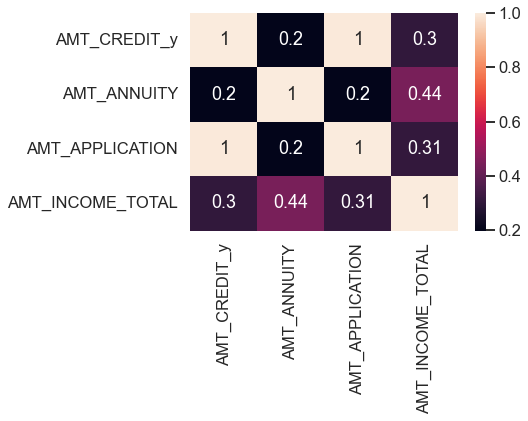

In [116]:
# creating heat map
sns.heatmap(data=corr_df,annot=True,cbar=True)

Points to conclude:

1. `AMT_APPLICATION` has a high correlation with `AMT_ANNUITY`, `AMT_CREDIT_y`.
2. `AMT_ ANNUITY ` has decent correlation with ‘AMT_INCOME_TOTAL’


# Bivariant analysis on Continuous Columns

In [192]:
final_cont_columns=['AMT_INCOME_TOTAL','AMT_CREDIT_y','AMT_APPLICATION']
final_categorical_columns=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',
                          'NAME_CLIENT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP']


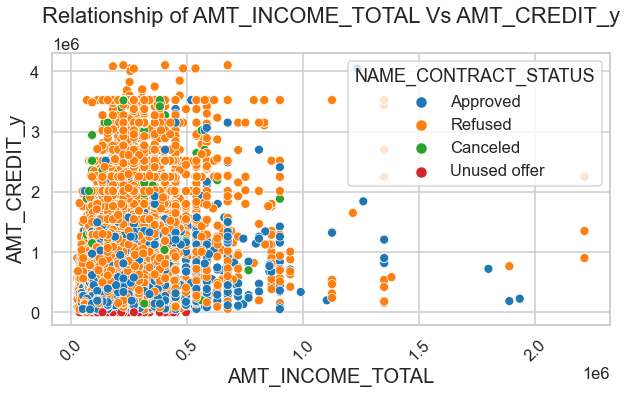

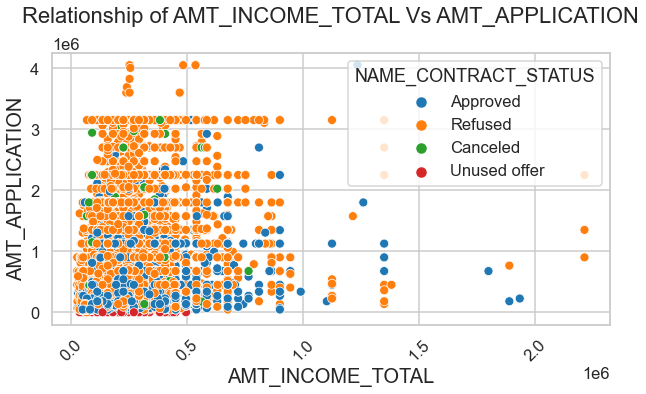

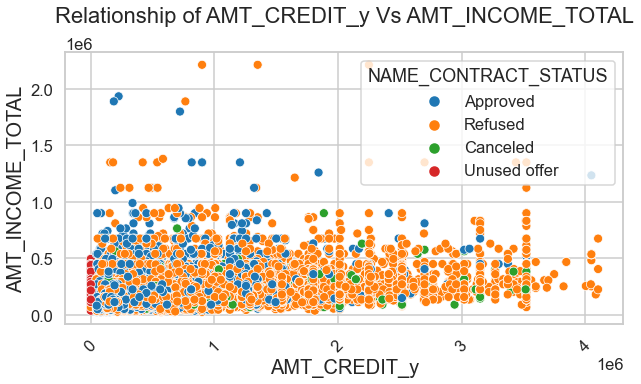

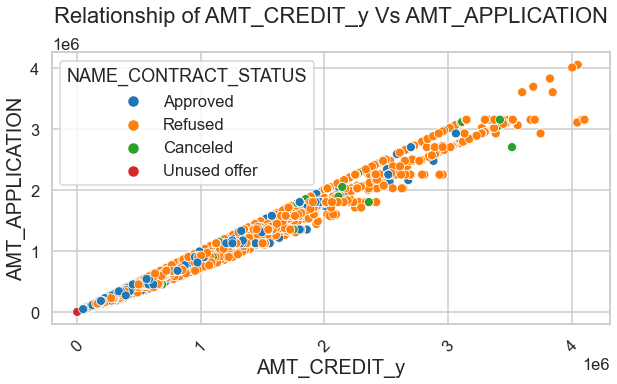

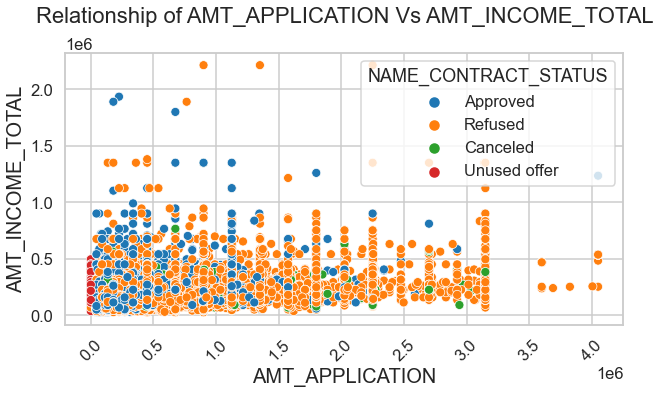

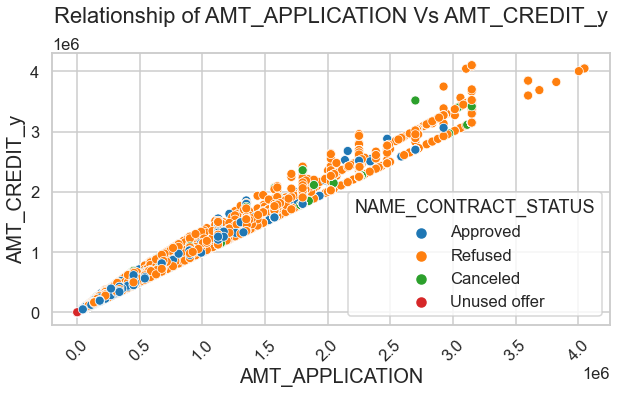

In [156]:
for x in final_cont_columns:
    for y in final_cont_columns:
        if x!=y:
            plt.figure(figsize=([10,5]))
            sns.scatterplot(data=new_df,x=x,y=y,hue='NAME_CONTRACT_STATUS')
            plt.xlabel(x)
            plt.title("Relationship of "+x+" Vs "+y)
            plt.xticks(rotation=45)
            plt.show()

Application amount has strong positive correlation with Credit amount


# Bivariant analysis on Categorical Vs Continuous Variable

Analysis of NAME_CONTRACT_STATUS V/S AMT_CREDIT_y V/S CODE_GENDER

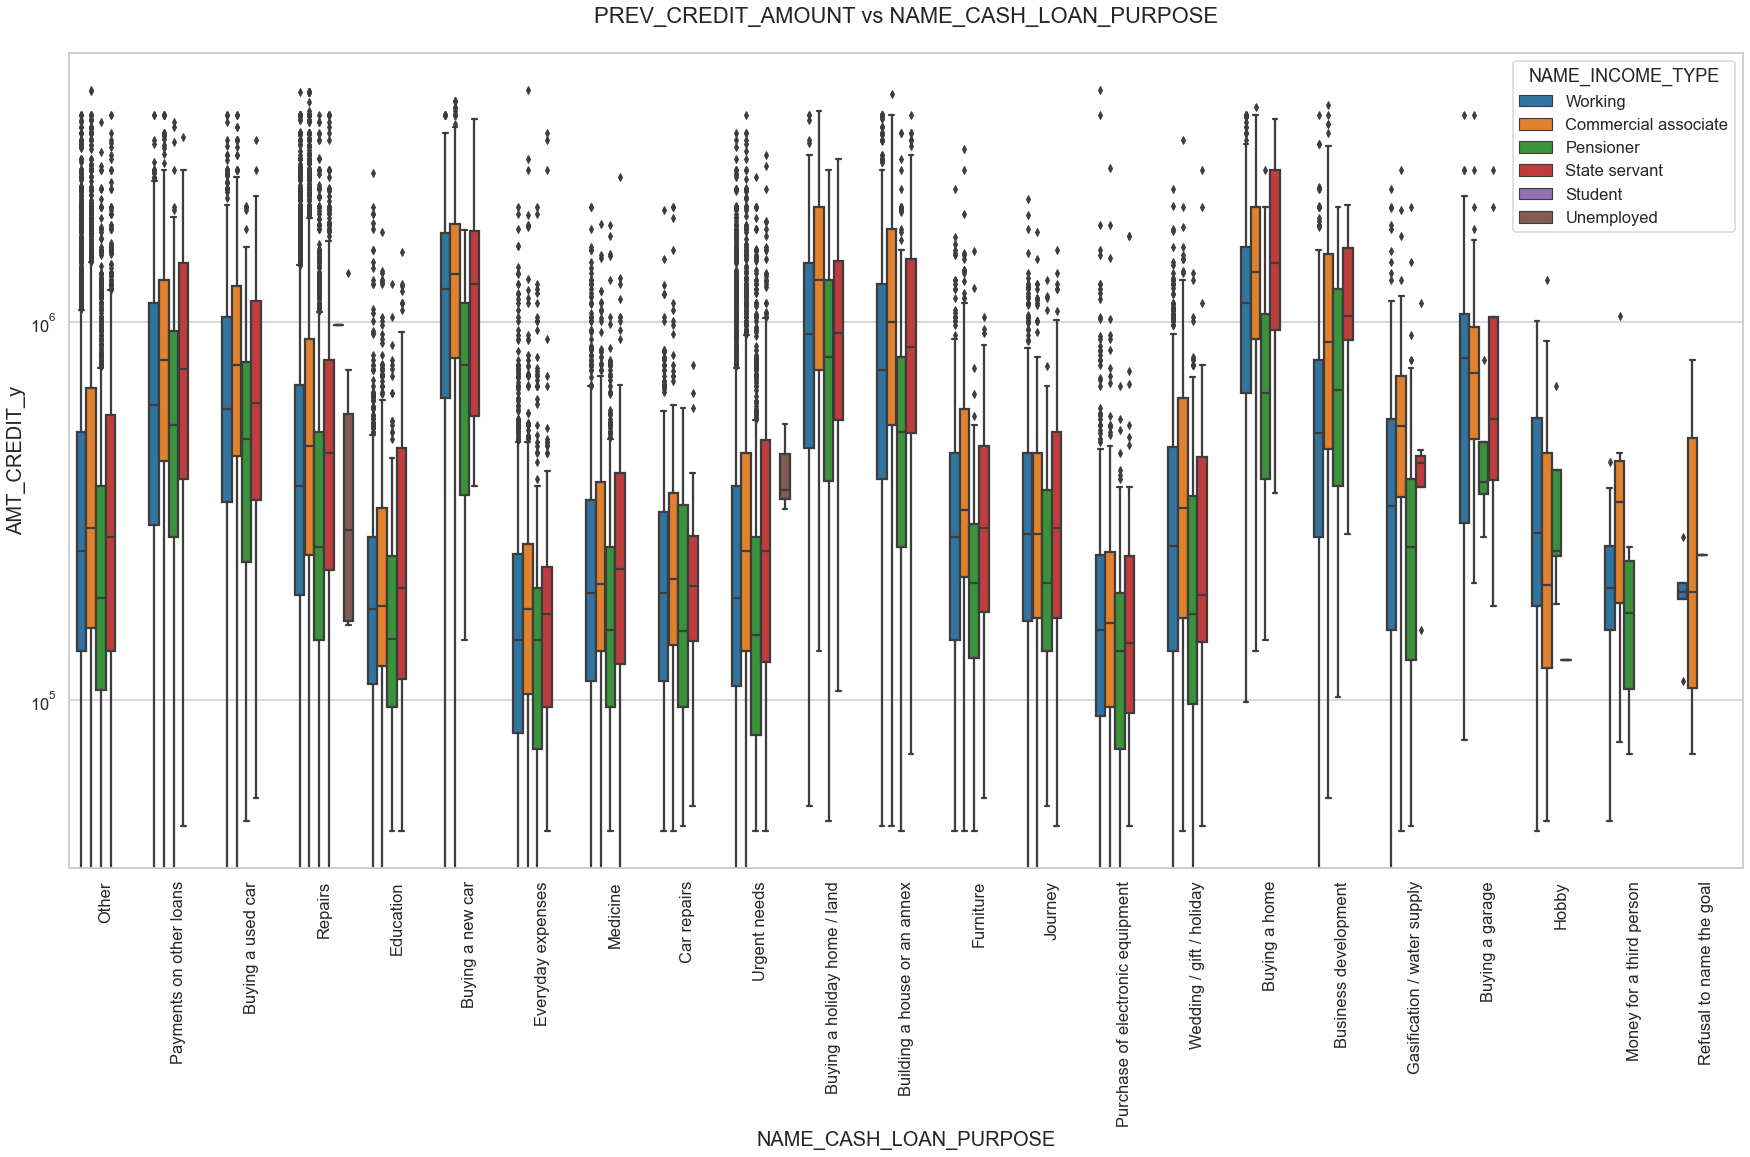

In [181]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =new_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_y',orient='v')
plt.title('PREV_CREDIT_AMOUNT vs NAME_CASH_LOAN_PURPOSE')
plt.show()

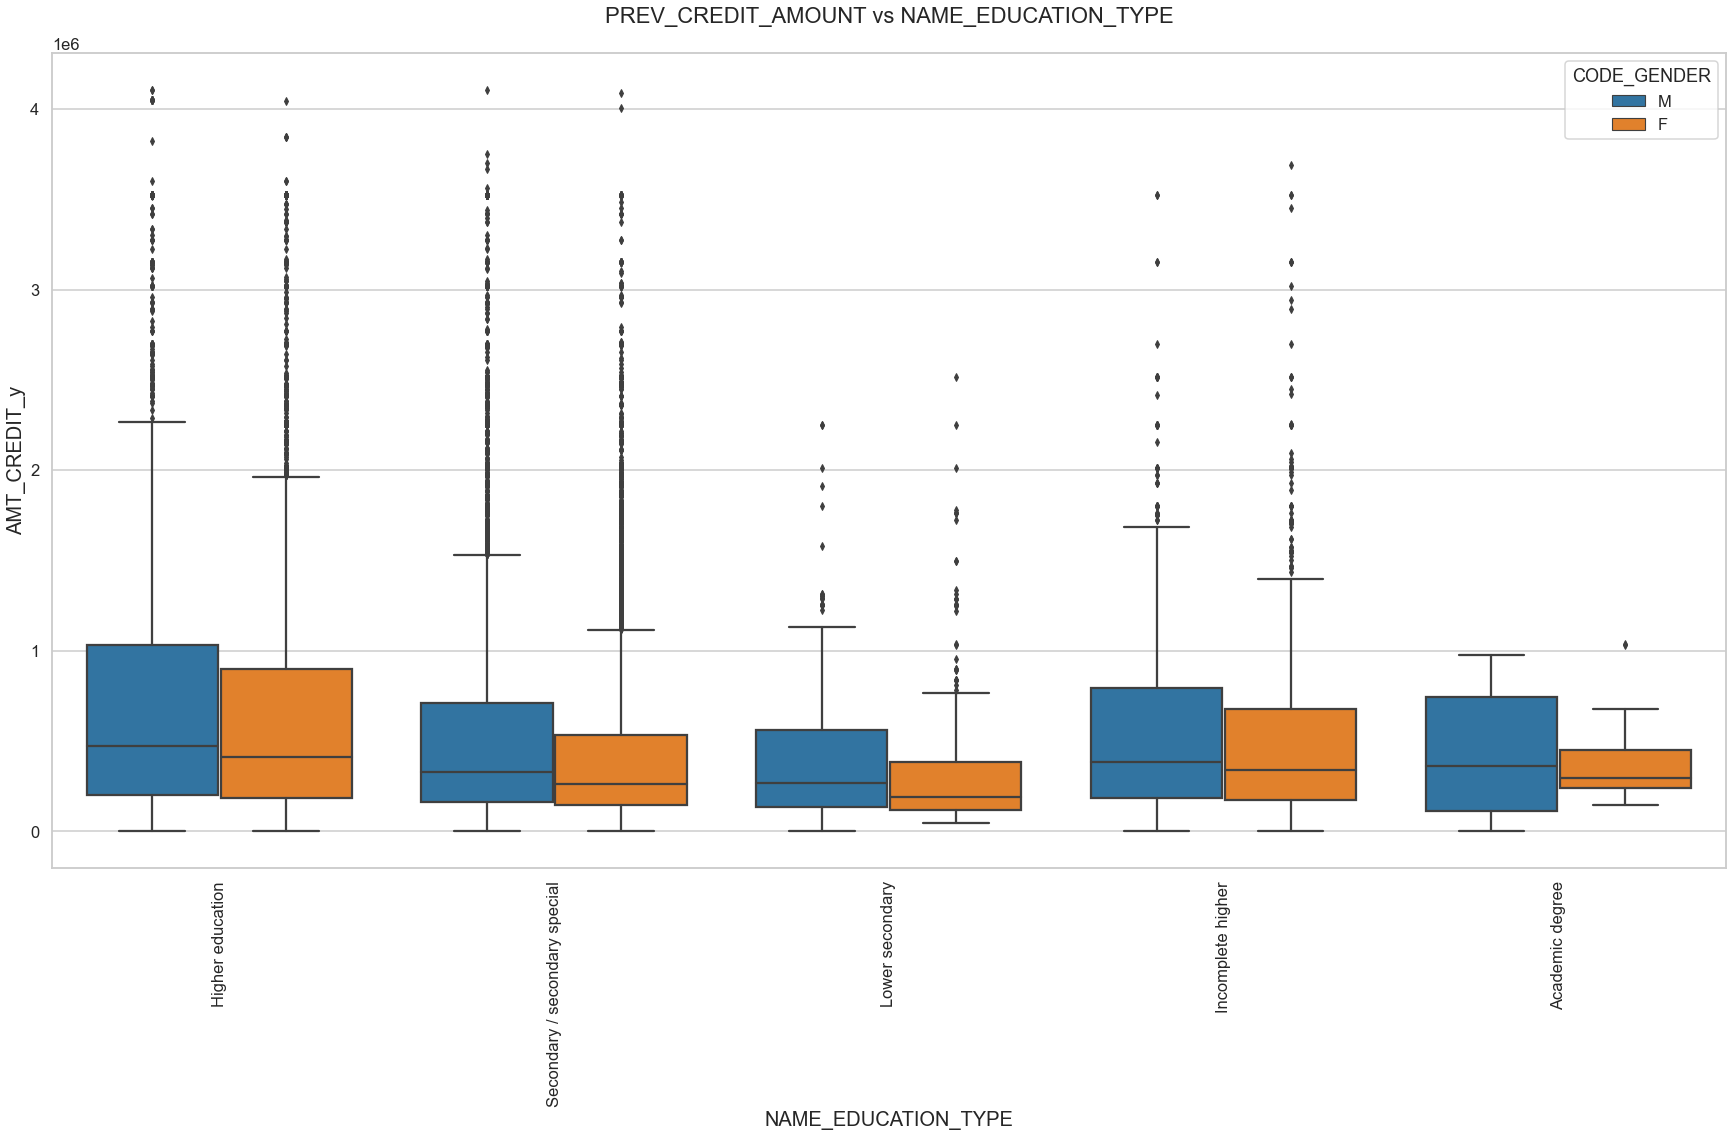

In [182]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)

sns.boxplot(data =new_df, x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',y='AMT_CREDIT_y',orient='v')
plt.title('PREV_CREDIT_AMOUNT vs NAME_EDUCATION_TYPE')
plt.show()

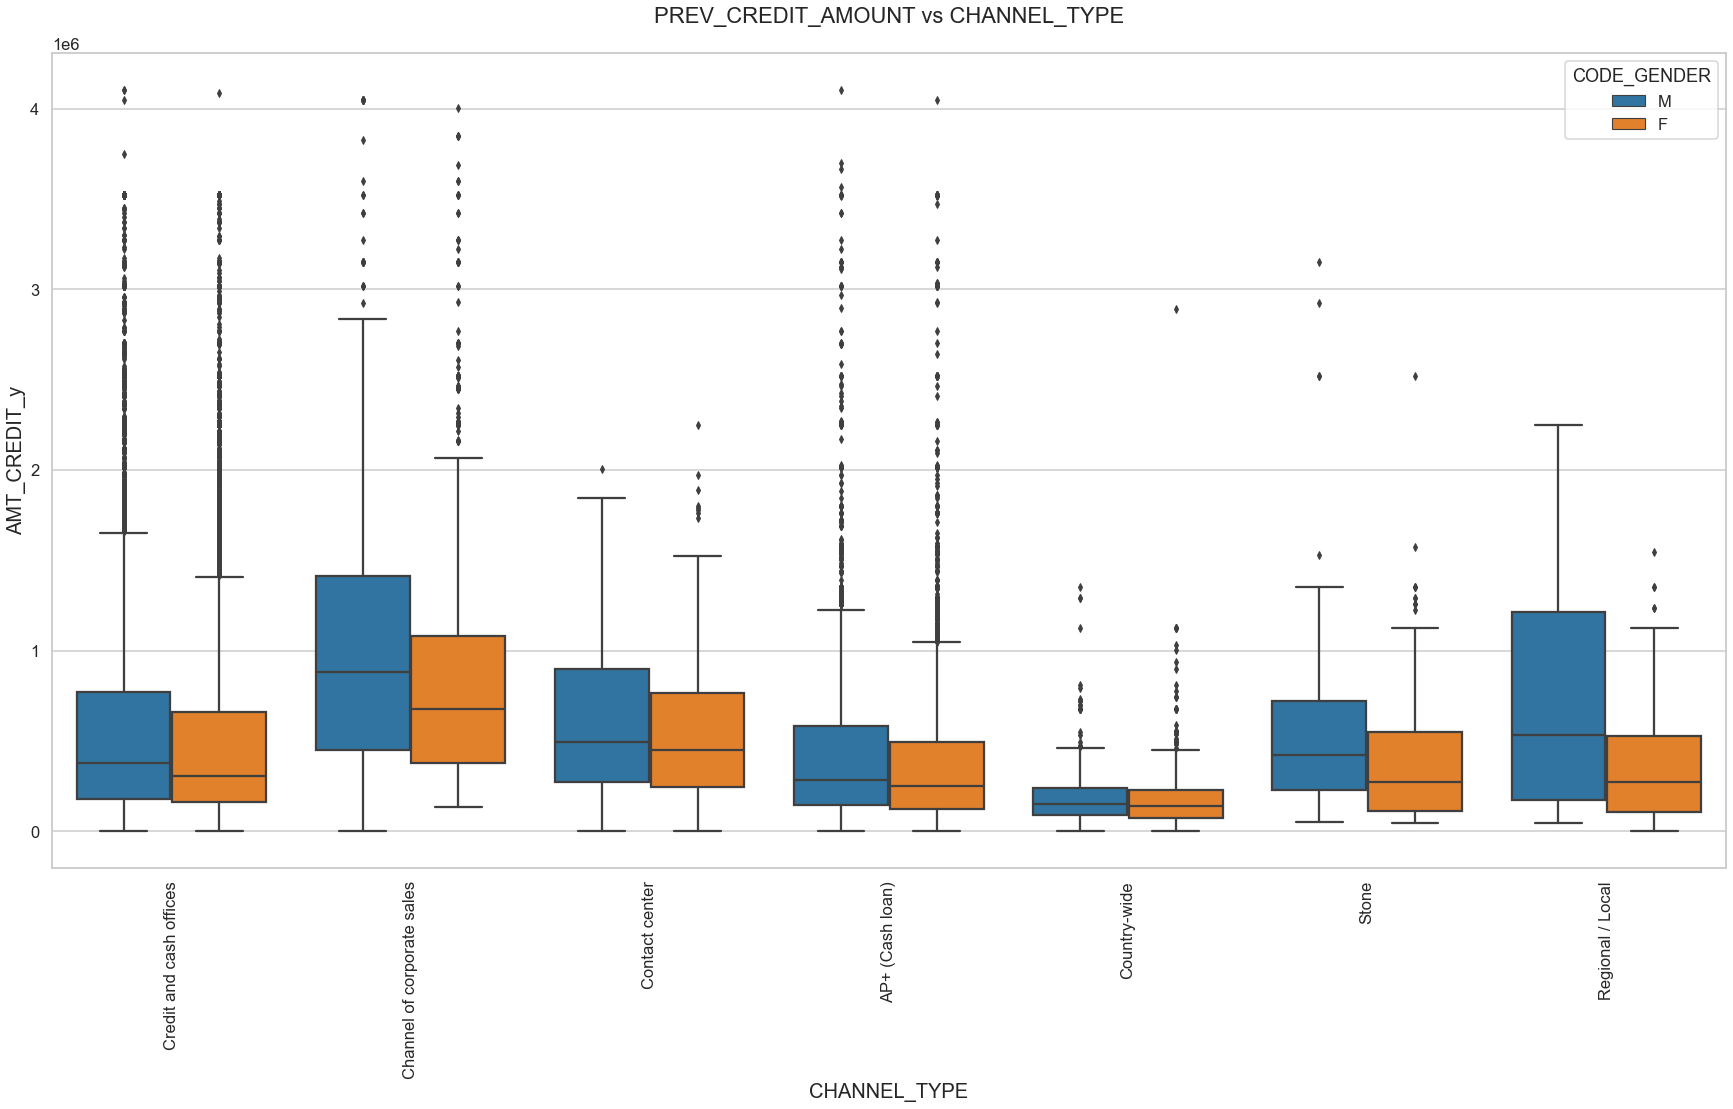

In [183]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)

sns.boxplot(data =new_df, x='CHANNEL_TYPE',hue='CODE_GENDER',y='AMT_CREDIT_y',orient='v')
plt.title('PREV_CREDIT_AMOUNT vs CHANNEL_TYPE')
plt.show()

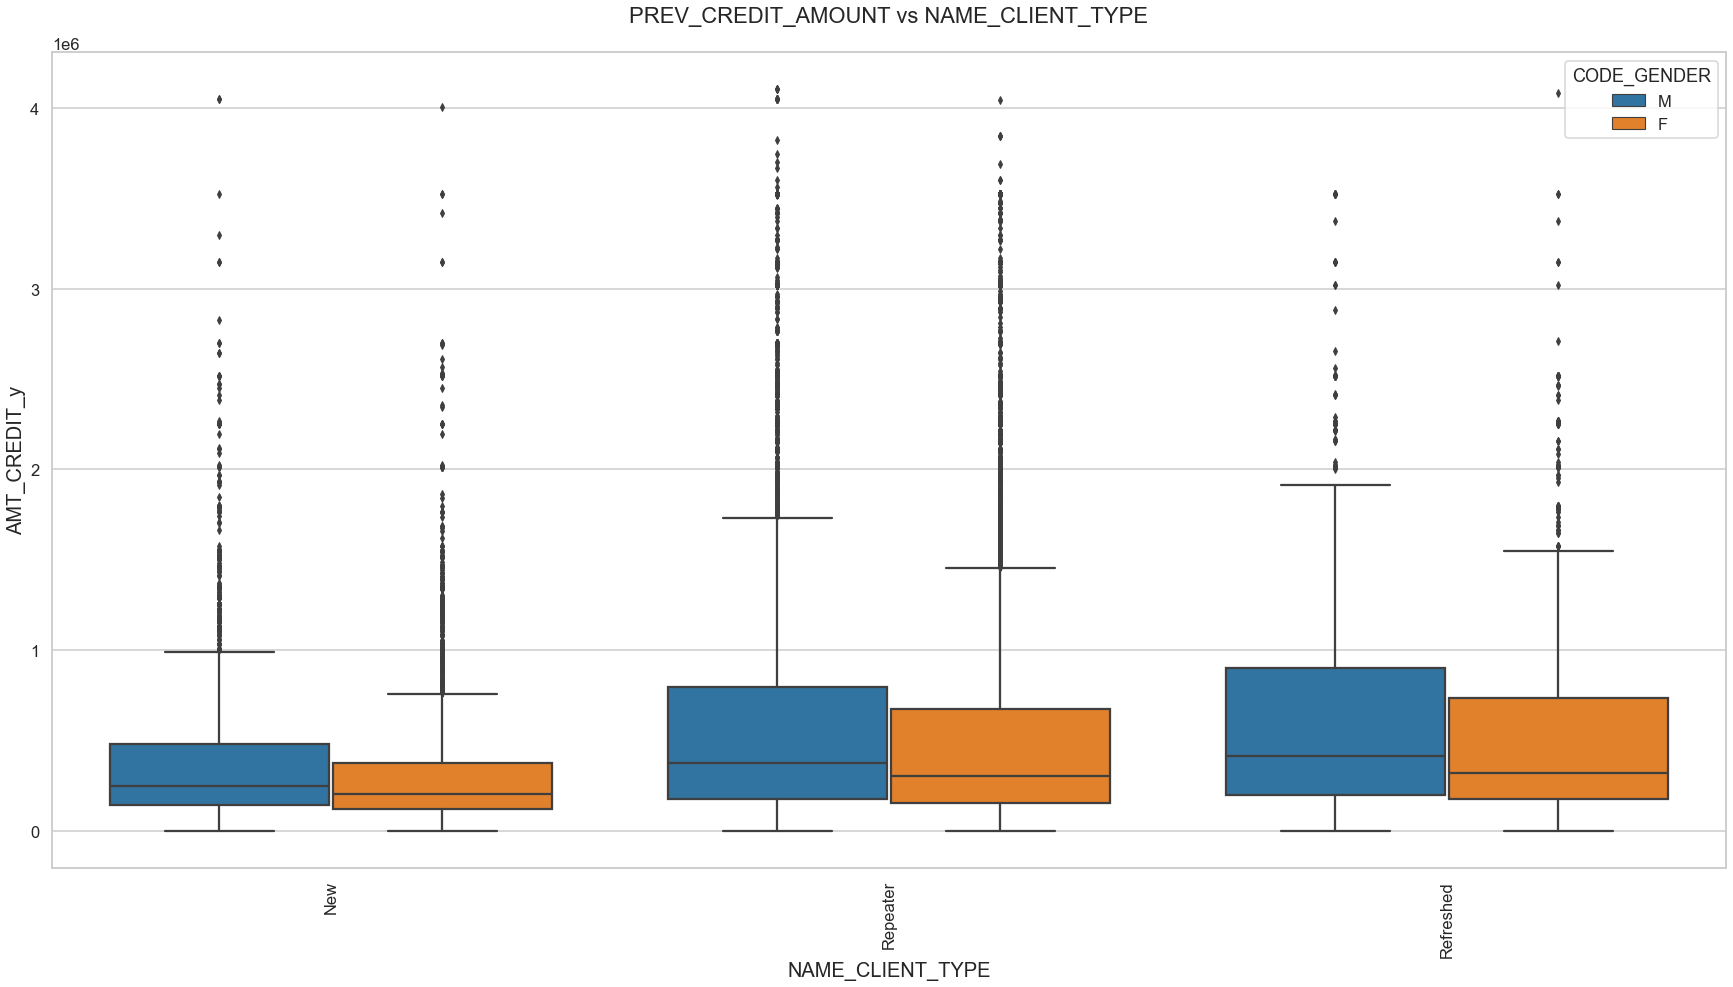

In [184]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)

sns.boxplot(data =new_df, x='NAME_CLIENT_TYPE',hue='CODE_GENDER',y='AMT_CREDIT_y',orient='v')
plt.title('PREV_CREDIT_AMOUNT vs NAME_CLIENT_TYPE')
plt.show()

CREDIT AMOUNT VS NAME EDUCATION TYPE

1. Credit amount for client with higher education and academic degree  are high in range compared to other education status

2. Credit amount for academic degree for female is  comparatively less with male client

3. Credit amount for lower secondary is least than other education type


CREDIT AMOUNT VS CHANNEL_TYPE

1. Credit amount for channel of corporate sales and Regional/Local are high range comparatively others
2. Credit amount for Country wide is least 
3. Male has highest credit amount range than female


CREDIT AMOUNT VS NAME CLIENT TYPE

1. Credit amount for new client will be least than refreshed and repeater client.


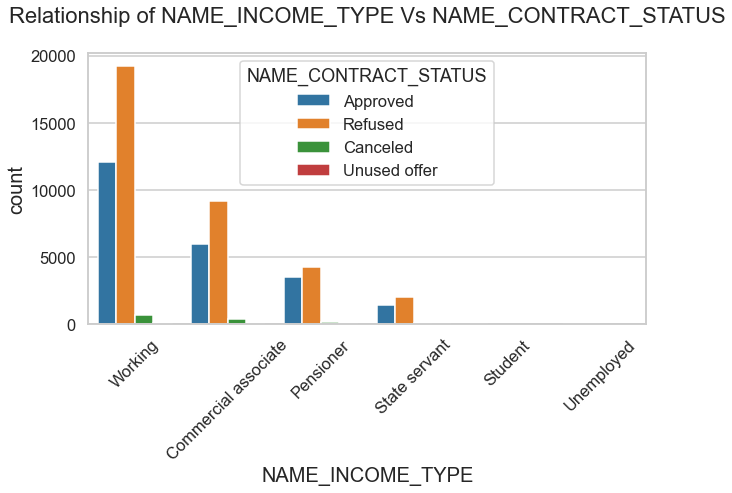

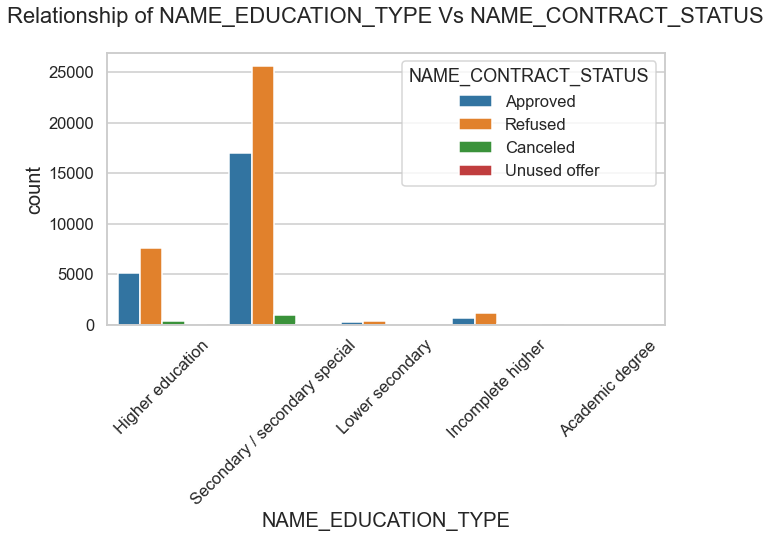

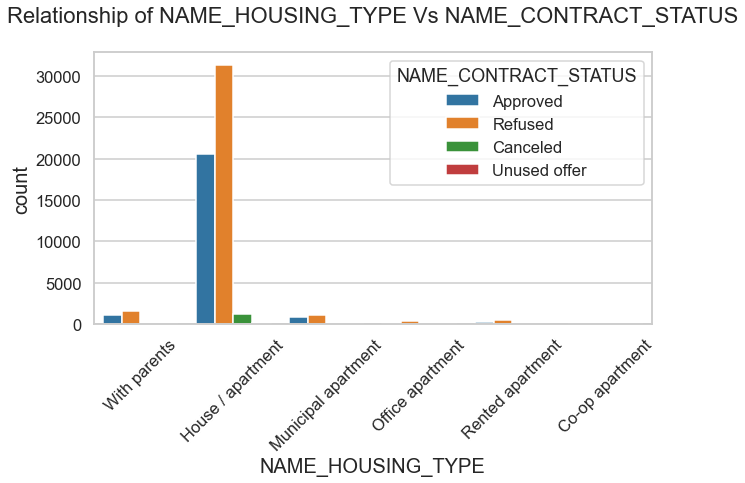

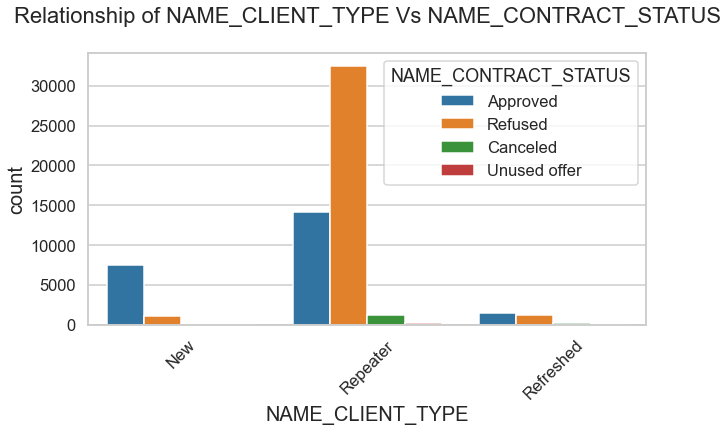

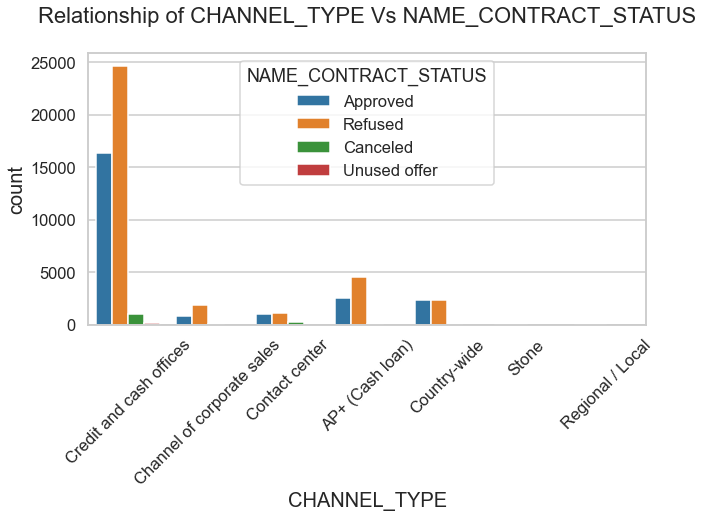

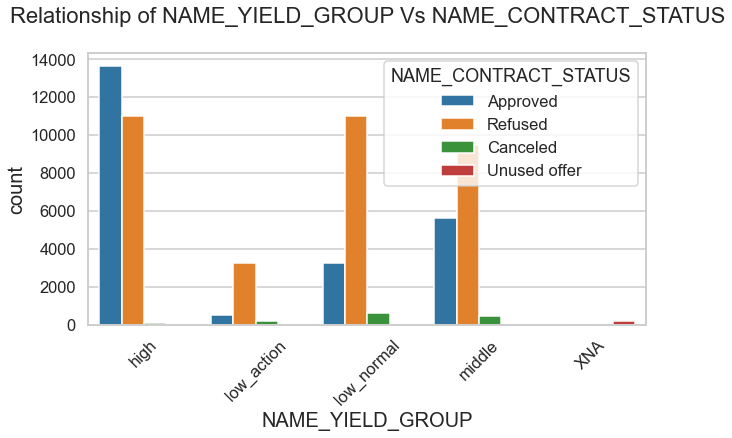

In [195]:
for x in final_categorical_columns:
        plt.figure(figsize=([10,5]))
        sns.countplot(data=new_df,x=x,hue='NAME_CONTRACT_STATUS')
        plt.xlabel(x)
        plt.title("Relationship of "+x+" Vs NAME_CONTRACT_STATUS" )
        plt.xticks(rotation=45)
        plt.show()

# Analysis on Categorical vs categorical variable

RELATIONSHIP OF NAME INCOME TYPE VS NAME CONTRACT STATUS

Client who are working have most approval and refusal contract .


RELATIONSHIP OF NAME CLIENT TYPE VS NAME CONTRACT STATUS

1. Repeater client have most approved contract status.

2. Refreshed have least approval status 

3. New client have highest approval than refreshed


RELATIONSHIP OF NAME EDUCATION TYPE VS NAME CONTRACT STATUS

1. Client with secondary/secondary special have highest approval and highest refusal contract status.

2. Academic degree have lease contract status.


RELATIONSHIP OF NAME HOUSING TYPE VS NAME CONTRACT STATUS

1. Co-op apartment has least contract status.

2. House /apartment has highest approval and refusal contract status


# Conclusion

Client categories to be targeted for providing loan:

1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’
2. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.
3. Clients who are married
4. Repeater clients
5. Male clients with academic degree.
6. Students and businessman
